In [216]:
# Libraries and utilities

# RENINDER: FARE FIT.TRANSFORM SOLO SU TRAINING E DOPO SUL TEST SOLO .TRANSFORM
# REMINDER: NORMALIZZARE PRIMA DI FARE TUTTO IL PREPROCESSING 

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import RobustScaler , StandardScaler
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

from sklearn.model_selection import StratifiedKFold,RepeatedStratifiedKFold, RandomizedSearchCV,GridSearchCV, RepeatedKFold

from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import (
    accuracy_score,
    f1_score,
    classification_report,
    confusion_matrix,
    roc_auc_score,
)
from scikitplot.metrics import plot_roc
from sklearn.metrics import roc_curve, auc, roc_auc_score

In [217]:
df_train=pd.read_csv("../Dataset_prepared/Prepared_train.csv")
df_test=pd.read_csv("../Dataset_prepared/Prepared_test.csv")


In [218]:
df_train.drop('actor',axis=1,inplace=True)
df_train.drop('filename',axis=1,inplace=True)
#df_train.drop('Unnamed: 0',axis=1,inplace=True)


df_test.drop('actor',axis=1,inplace=True)
df_test.drop('filename',axis=1,inplace=True)
#df_test.drop('Unnamed: 0',axis=1,inplace=True)






In [219]:
df_train.head()

,vocal_channel,emotion,emotional_intensity,statement,repetition,sex,mean,q25,q50,q75,...,sc_skew_w4,stft_sum_w4,stft_q01_w4,stft_q05_w4,stft_q25_w4,stft_q50_w4,stft_q75_w4,stft_q95_w4,stft_kur_w4,stft_skew_w4
0,speech,neutral,normal,Kids are talking by the door,1st,M,9.150000e-07,-0.000031,0.0,0.0,...,-4.175609,740.409892,0.000000,0.566462,0.709962,0.799141,0.896606,1.0,6.742190,-1.706215
1,speech,neutral,normal,Kids are talking by the door,2nd,M,7.137790e-07,-0.000031,0.0,0.0,...,-1.100390,705.975006,0.368623,0.472736,0.623183,0.744908,0.874713,1.0,-0.700420,-0.201495
2,speech,neutral,normal,Dogs are sitting by the door,1st,M,9.554485e-07,0.000000,0.0,0.0,...,-3.120218,694.365924,0.000000,0.417919,0.643636,0.774253,0.899156,1.0,1.688986,-1.024773
3,speech,neutral,normal,Dogs are sitting by the door,2nd,M,9.176213e-07,-0.000031,0.0,0.0,...,-0.880988,663.205667,0.306280,0.399641,0.606910,0.755213,0.886474,1.0,-0.594111,-0.412871
4,speech,calm,normal,Kids are talking by the door,1st,M,8.108948e-07,-0.000031,0.0,0.0,...,-1.071109,741.412796,0.248765,0.428202,0.634815,0.759914,0.878014,1.0,0.126535,-0.620782


FACCIAMO LA CLASSIFICAZIONE NORMALE 

In [220]:
df_train_c = df_train.copy()
df_test_c = df_test.copy()



LABEL ENCODING TRAIN FOR NORMAL CLASSIFICATION + NORMALIZATION

In [221]:
cat_var=["statement","repetition","sex","emotional_intensity","vocal_channel"]
le=preprocessing.LabelEncoder()
for i in cat_var:
    df_train_c[i]=le.fit_transform(df_train_c[i])
categorical_col = ["emotion"]

df_train_c = pd.get_dummies(df_train_c, columns=categorical_col)    

df_train_c.head()

,vocal_channel,emotional_intensity,statement,repetition,sex,mean,q25,q50,q75,kur,...,stft_kur_w4,stft_skew_w4,emotion_angry,emotion_calm,emotion_disgust,emotion_fearful,emotion_happy,emotion_neutral,emotion_sad,emotion_surprised
0,1,0,1,0,1,9.150000e-07,-0.000031,0.0,0.0,15.028520,...,6.742190,-1.706215,0,0,0,0,0,1,0,0
1,1,0,1,1,1,7.137790e-07,-0.000031,0.0,0.0,16.488415,...,-0.700420,-0.201495,0,0,0,0,0,1,0,0
2,1,0,0,0,1,9.554485e-07,0.000000,0.0,0.0,17.035218,...,1.688986,-1.024773,0,0,0,0,0,1,0,0
3,1,0,0,1,1,9.176213e-07,-0.000031,0.0,0.0,21.824521,...,-0.594111,-0.412871,0,0,0,0,0,1,0,0
4,1,0,1,0,1,8.108948e-07,-0.000031,0.0,0.0,13.236022,...,0.126535,-0.620782,0,1,0,0,0,0,0,0


In [222]:
numeric_features = [n for n in df_train_c.columns if n!="emotion_angry" and n!= "vocal_channel" and n!= "emotional_intensity" and n!= "statement" and n!= "repetition" and n!= "sex" and   n!="emotion_calm" and  n!="emotion_disgust" and  n!="emotion_fearful" and  n!="emotion_happy" and  n!="emotion_neutral" and n!="emotion_sad" and  n!="emotion_surprised"]

scaler = StandardScaler()
scaled_features = scaler.fit_transform(df_train_c[numeric_features])
df_train_c[numeric_features] = scaled_features
df_train_c.head()


col = [x for x in df_train_c.columns if x!='emotional_intensity']
X_train=df_train_c[col].values
y_train = np.array(df_train_c["emotional_intensity"])






LABEL ENCODING TEST FOR NORMAL CLASSIFICATION + NORMALIZATION

In [223]:
for i in cat_var:
    df_test_c[i]=le.fit_transform(df_test_c[i])
categorical_col = ["emotion"]

df_test_c = pd.get_dummies(df_test_c, columns=categorical_col)    

df_test_c.head()

,vocal_channel,emotional_intensity,statement,repetition,sex,mean,q25,q50,q75,kur,...,stft_kur_w4,stft_skew_w4,emotion_angry,emotion_calm,emotion_disgust,emotion_fearful,emotion_happy,emotion_neutral,emotion_sad,emotion_surprised
0,1,0,1,0,1,2.940224e-06,-0.000092,0.0,0.000153,11.392131,...,-0.260279,-0.566556,0,0,0,0,0,1,0,0
1,1,0,1,1,1,7.733752e-07,-0.000122,0.0,0.000153,13.621589,...,-0.428900,-0.587210,0,0,0,0,0,1,0,0
2,1,0,0,0,1,-3.741909e-06,-0.000061,0.0,0.000092,7.678162,...,0.626916,-0.883317,0,0,0,0,0,1,0,0
3,1,0,0,1,1,-5.069646e-07,-0.000092,0.0,0.000122,14.511231,...,-0.825144,-0.383701,0,0,0,0,0,1,0,0
4,1,0,1,0,1,8.640319e-07,-0.000061,0.0,0.000122,8.944732,...,-0.536669,-0.547354,0,1,0,0,0,0,0,0


In [224]:
numeric_features = [n for n in df_test_c.columns if n!="emotion_angry" and n!= "vocal_channel" and n!= "emotional_intensity" and n!= "statement" and n!= "repetition" and n!= "sex" and   n!="emotion_calm" and  n!="emotion_disgust" and  n!="emotion_fearful" and  n!="emotion_happy" and  n!="emotion_neutral" and n!="emotion_sad" and  n!="emotion_surprised"]


scaled_features = scaler.transform(df_test_c[numeric_features])
df_test_c[numeric_features] = scaled_features
df_test_c.head()


col = [x for x in df_test_c.columns if x!='emotional_intensity']
X_test=df_test_c[col].values
y_test = np.array(df_test_c["emotional_intensity"])






GRID SEARCH PER LA CLASSIFICAZIONE NORMALE

In [225]:
param_grid = {'max_depth': [None, 2, 5, 10, 15, 20],
              'min_samples_split': [2, 5, 10, 15, 20],
              'min_samples_leaf': [1, 5, 10, 15, 20]
}

grid = GridSearchCV(
    DecisionTreeClassifier(),
    param_grid=param_grid,
    cv=StratifiedKFold(), # with no parameters it is with 5 split and 10 repetitions
    refit=True,
    scoring="f1_macro"
)
grid.fit(X_train, y_train)
clf = grid.best_estimator_

In [226]:
print(grid.best_params_)

{'max_depth': 5, 'min_samples_leaf': 15, 'min_samples_split': 15}


In [227]:
param_grid = {
    "n_neighbors": np.arange(2,51),
    "weights": ["uniform", "distance"],
    "metric": ["euclidean", "cityblock","minkowski"], # cityblock is the manhattan distance
}

grid = GridSearchCV(
    KNeighborsClassifier(),
    param_grid=param_grid,
    cv=StratifiedKFold(), # with no parameters it is with 5 split and 10 repetitions
    refit=True,
    scoring="f1_macro"
)

grid.fit(X_train, y_train)
clf = grid.best_estimator_

In [228]:
print(grid.best_params_)

{'metric': 'cityblock', 'n_neighbors': 20, 'weights': 'distance'}


TESTIAMO I NOSTRI MODELLI :D

In [229]:
learner_KNN = KNeighborsClassifier(n_neighbors= 20, metric= 'cityblock', weights= 'distance')
classifier = learner_KNN.fit(X_train, y_train)
predictions = classifier.predict(X_test)

print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.66      0.90      0.76       336
           1       0.80      0.45      0.58       288

    accuracy                           0.70       624
   macro avg       0.73      0.68      0.67       624
weighted avg       0.72      0.70      0.68       624



In [230]:
learner_DT= DecisionTreeClassifier(max_depth=5,min_samples_leaf=15,min_samples_split=5)
classifier = learner_DT.fit(X_train, y_train)
predictions = classifier.predict(X_test)

print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.71      0.71      0.71       336
           1       0.66      0.66      0.66       288

    accuracy                           0.69       624
   macro avg       0.69      0.69      0.69       624
weighted avg       0.69      0.69      0.69       624



VERIFICHIAMO I VALORI DI EMOTIONAL INTENSITY NEL TRAINING

In [231]:
df_train['emotional_intensity'].value_counts()

normal    984
strong    844
Name: emotional_intensity, dtype: int64

<AxesSubplot:xlabel='emotional_intensity', ylabel='count'>

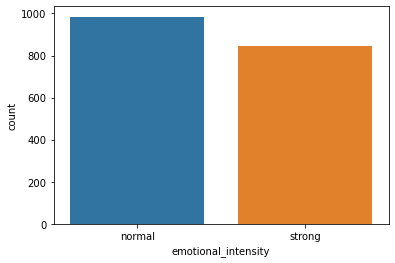

In [232]:
sns.countplot(data=df_train,x='emotional_intensity')

PROVO A SBILANCIARE

In [233]:
df_copy_train = df_train.copy()
#df_copy_train.drop('emotional_intensity',axis=1,inplace=True)

In [234]:
# Selezioniamo solo il 10% dei valori "strong"
#strong = df_train.loc[df_train['emotional_intensity'] == 'strong'].sample(frac=0.9)
#strong 
indexNames = df_train[ df_train['emotional_intensity'] == 'strong' ].sample(frac=0.93).index
df_copy_train.drop(indexNames,axis=0,inplace=True)






# Uniamo i dati selezionati con il restante 90% dei valori "normal"
#df_copy_train = pd.concat([df_train.loc[df_train['emotional_intensity'] == 'normal'], strong])



In [235]:
# Stampa della nuova proporzione di valori

print(df_copy_train['emotional_intensity'].value_counts(normalize=True))


normal    0.943432
strong    0.056568
Name: emotional_intensity, dtype: float64


In [236]:
df_copy_train['emotional_intensity'].value_counts()

normal    984
strong     59
Name: emotional_intensity, dtype: int64

<AxesSubplot:xlabel='emotional_intensity', ylabel='count'>

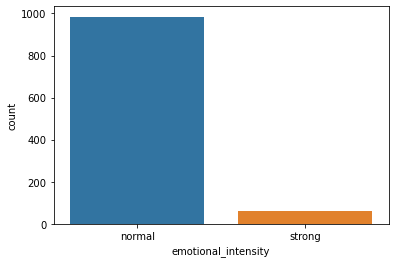

In [237]:
sns.countplot(data=df_copy_train,x='emotional_intensity')

In [238]:
df_copy_train.head()

,vocal_channel,emotion,emotional_intensity,statement,repetition,sex,mean,q25,q50,q75,...,sc_skew_w4,stft_sum_w4,stft_q01_w4,stft_q05_w4,stft_q25_w4,stft_q50_w4,stft_q75_w4,stft_q95_w4,stft_kur_w4,stft_skew_w4
0,speech,neutral,normal,Kids are talking by the door,1st,M,9.150000e-07,-0.000031,0.0,0.0,...,-4.175609,740.409892,0.000000,0.566462,0.709962,0.799141,0.896606,1.0,6.742190,-1.706215
1,speech,neutral,normal,Kids are talking by the door,2nd,M,7.137790e-07,-0.000031,0.0,0.0,...,-1.100390,705.975006,0.368623,0.472736,0.623183,0.744908,0.874713,1.0,-0.700420,-0.201495
2,speech,neutral,normal,Dogs are sitting by the door,1st,M,9.554485e-07,0.000000,0.0,0.0,...,-3.120218,694.365924,0.000000,0.417919,0.643636,0.774253,0.899156,1.0,1.688986,-1.024773
3,speech,neutral,normal,Dogs are sitting by the door,2nd,M,9.176213e-07,-0.000031,0.0,0.0,...,-0.880988,663.205667,0.306280,0.399641,0.606910,0.755213,0.886474,1.0,-0.594111,-0.412871
4,speech,calm,normal,Kids are talking by the door,1st,M,8.108948e-07,-0.000031,0.0,0.0,...,-1.071109,741.412796,0.248765,0.428202,0.634815,0.759914,0.878014,1.0,0.126535,-0.620782


In [239]:
df_copy_train.shape

(1043, 259)

VERIFICHIAMO I VALORI DI EMOTIONAL INTENSITY NEL TEST E SBILANCIAMO


In [240]:
df_test['emotional_intensity'].value_counts()

normal    336
strong    288
Name: emotional_intensity, dtype: int64

<AxesSubplot:xlabel='emotional_intensity', ylabel='count'>

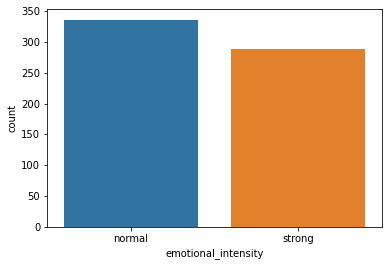

In [241]:
sns.countplot(data=df_test,x='emotional_intensity')

In [242]:
df_copy_test = df_test.copy()


In [243]:
# Selezioniamo solo il 10% dei valori "strong"
#strong = df_train.loc[df_train['emotional_intensity'] == 'strong'].sample(frac=0.9)
#strong 
indexNames = df_test[ df_test['emotional_intensity'] == 'strong' ].sample(frac=0.93).index
df_copy_test.drop(indexNames,axis=0,inplace=True)




In [244]:
# Stampa della nuova proporzione di valori

print(df_copy_test['emotional_intensity'].value_counts(normalize=True))


normal    0.94382
strong    0.05618
Name: emotional_intensity, dtype: float64


In [245]:
df_copy_test['emotional_intensity'].value_counts()

normal    336
strong     20
Name: emotional_intensity, dtype: int64

In [246]:
# Stampa della nuova proporzione di valori

print(df_copy_test['emotional_intensity'].value_counts(normalize=True))


normal    0.94382
strong    0.05618
Name: emotional_intensity, dtype: float64


In [247]:
df_copy_test['emotional_intensity'].value_counts()

normal    336
strong     20
Name: emotional_intensity, dtype: int64

<AxesSubplot:xlabel='emotional_intensity', ylabel='count'>

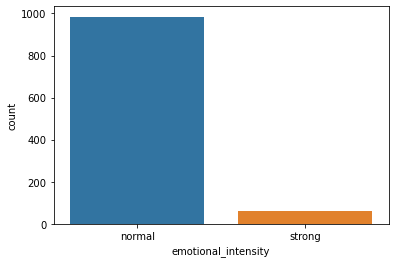

In [248]:
sns.countplot(data=df_copy_train,x='emotional_intensity')

LABEL ENCODING  TRAINING

In [249]:
c=df_copy_train.select_dtypes(include=['object']).columns.tolist()
c

['vocal_channel',
 'emotion',
 'emotional_intensity',
 'statement',
 'repetition',
 'sex']

In [250]:
cat_var=["statement","repetition","sex","emotional_intensity","vocal_channel"]
le=preprocessing.LabelEncoder()
for i in cat_var:
    df_copy_train[i]=le.fit_transform(df_copy_train[i])
categorical_col = ["emotion"]

df_copy_train = pd.get_dummies(df_copy_train, columns=categorical_col)    

df_copy_train.head()

,vocal_channel,emotional_intensity,statement,repetition,sex,mean,q25,q50,q75,kur,...,stft_kur_w4,stft_skew_w4,emotion_angry,emotion_calm,emotion_disgust,emotion_fearful,emotion_happy,emotion_neutral,emotion_sad,emotion_surprised
0,1,0,1,0,1,9.150000e-07,-0.000031,0.0,0.0,15.028520,...,6.742190,-1.706215,0,0,0,0,0,1,0,0
1,1,0,1,1,1,7.137790e-07,-0.000031,0.0,0.0,16.488415,...,-0.700420,-0.201495,0,0,0,0,0,1,0,0
2,1,0,0,0,1,9.554485e-07,0.000000,0.0,0.0,17.035218,...,1.688986,-1.024773,0,0,0,0,0,1,0,0
3,1,0,0,1,1,9.176213e-07,-0.000031,0.0,0.0,21.824521,...,-0.594111,-0.412871,0,0,0,0,0,1,0,0
4,1,0,1,0,1,8.108948e-07,-0.000031,0.0,0.0,13.236022,...,0.126535,-0.620782,0,1,0,0,0,0,0,0


INTRODUCO LE LIBRERIE DI UNDER/OVER + DIM_RED

In [251]:

from imblearn.under_sampling import RandomUnderSampler
from imblearn.under_sampling import CondensedNearestNeighbour
from imblearn.under_sampling import TomekLinks
from imblearn.under_sampling import EditedNearestNeighbours
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import ADASYN

from collections import Counter
from sklearn.decomposition import PCA




NORMALIZZAZIONE TRAINING

In [252]:
numeric_features = [n for n in df_copy_train.columns if n!="emotion_angry" and n!= "vocal_channel" and n!= "emotional_intensity" and n!= "statement" and n!= "repetition" and n!= "sex" and   n!="emotion_calm" and  n!="emotion_disgust" and  n!="emotion_fearful" and  n!="emotion_happy" and  n!="emotion_neutral" and n!="emotion_sad" and  n!="emotion_surprised"]

scaler = StandardScaler()
scaled_features = scaler.fit_transform(df_copy_train[numeric_features])
df_copy_train[numeric_features] = scaled_features
df_copy_train.head()


col = [x for x in df_copy_train.columns if x!='emotional_intensity']
X_train=df_copy_train[col].values
y_train = np.array(df_copy_train["emotional_intensity"])






NORMALIZZAZIONE + LABEL ENCODING + HOLDOUT TEST

In [253]:
for i in cat_var:
    df_copy_test[i]=le.fit_transform(df_copy_test[i])
categorical_col = ["emotion"]

df_copy_test = pd.get_dummies(df_copy_test, columns=categorical_col)    

df_copy_test.head()

,vocal_channel,emotional_intensity,statement,repetition,sex,mean,q25,q50,q75,kur,...,stft_kur_w4,stft_skew_w4,emotion_angry,emotion_calm,emotion_disgust,emotion_fearful,emotion_happy,emotion_neutral,emotion_sad,emotion_surprised
0,1,0,1,0,1,2.940224e-06,-0.000092,0.0,0.000153,11.392131,...,-0.260279,-0.566556,0,0,0,0,0,1,0,0
1,1,0,1,1,1,7.733752e-07,-0.000122,0.0,0.000153,13.621589,...,-0.428900,-0.587210,0,0,0,0,0,1,0,0
2,1,0,0,0,1,-3.741909e-06,-0.000061,0.0,0.000092,7.678162,...,0.626916,-0.883317,0,0,0,0,0,1,0,0
3,1,0,0,1,1,-5.069646e-07,-0.000092,0.0,0.000122,14.511231,...,-0.825144,-0.383701,0,0,0,0,0,1,0,0
4,1,0,1,0,1,8.640319e-07,-0.000061,0.0,0.000122,8.944732,...,-0.536669,-0.547354,0,1,0,0,0,0,0,0


In [254]:
scaled_features = scaler.transform(df_copy_test[numeric_features])
df_copy_test[numeric_features] = scaled_features
df_copy_test.head()


col = [x for x in df_copy_train.columns if x!='emotional_intensity']
X_test=df_copy_test[col].values
y_test = np.array(df_copy_test["emotional_intensity"])


ISTANZIO LA GRID SEARCH PER IL KNN E IL DT 

In [255]:
param_grid = {'max_depth': [None, 2, 5, 10, 15, 20],
              'min_samples_split': [2, 5, 10, 15, 20],
              'min_samples_leaf': [1, 5, 10, 15, 20]
}

grid = GridSearchCV(
    DecisionTreeClassifier(),
    param_grid=param_grid,
    cv=StratifiedKFold(), # with no parameters it is with 5 split and 10 repetitions
    refit=True,
    scoring="f1_macro"
)
grid.fit(X_train, y_train)
clf = grid.best_estimator_

In [256]:
print(grid.best_params_)

{'max_depth': 10, 'min_samples_leaf': 10, 'min_samples_split': 5}


In [257]:
param_grid = {
    "n_neighbors": np.arange(2,51),
    "weights": ["uniform", "distance"],
    "metric": ["euclidean", "cityblock","minkowski"], # cityblock is the manhattan distance
}

grid = GridSearchCV(
    KNeighborsClassifier(),
    param_grid=param_grid,
    cv=StratifiedKFold(), # with no parameters it is with 5 split and 10 repetitions
    refit=True,
    scoring="f1_macro"
)

grid.fit(X_train, y_train)
clf = grid.best_estimator_

In [258]:
print(grid.best_params_)

{'metric': 'euclidean', 'n_neighbors': 2, 'weights': 'distance'}


RISULTATI NORMALI

              precision    recall  f1-score   support

           0       0.95      0.97      0.96       336
           1       0.18      0.10      0.13        20

    accuracy                           0.92       356
   macro avg       0.56      0.54      0.54       356
weighted avg       0.90      0.92      0.91       356



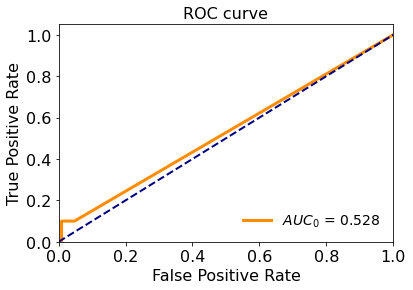

In [259]:
learner_KNN = KNeighborsClassifier(n_neighbors= 2, metric= 'euclidean', weights= 'distance')
classifier = learner_KNN.fit(X_train, y_train)
predictions = classifier.predict(X_test)

print(classification_report(y_test,predictions))

y_score = classifier.predict_proba(X_test)
fpr0, tpr0, thr = roc_curve(y_test, y_score[:,1])
roc_auc0 = auc(fpr0, tpr0)
plt.plot(fpr0, tpr0, color='darkorange', lw=3, label='$AUC_0$ = %.3f' % (roc_auc0))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.title('ROC curve', fontsize=16)
plt.legend(loc="lower right", fontsize=14, frameon=False)
plt.tick_params(axis='both', which='major', labelsize=16)
plt.show()
#learner_DT= DecisionTreeClassifier(max_depth=5,min_samples_leaf=1,min_samples_split=20)

In [260]:
learner_DT= DecisionTreeClassifier(max_depth=15,min_samples_leaf=10,min_samples_split=15)
classifier = learner_DT.fit(X_train, y_train)
predictions = classifier.predict(X_test)

print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.95      0.98      0.97       336
           1       0.33      0.15      0.21        20

    accuracy                           0.94       356
   macro avg       0.64      0.57      0.59       356
weighted avg       0.92      0.94      0.92       356



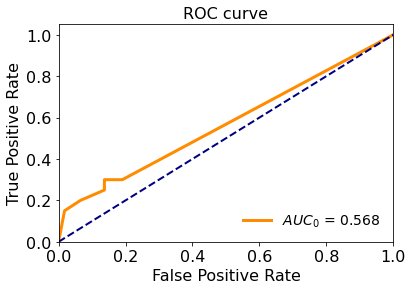

In [261]:
y_score = classifier.predict_proba(X_test)
fpr0, tpr0, thr = roc_curve(y_test, y_score[:,1])
roc_auc0 = auc(fpr0, tpr0)
plt.plot(fpr0, tpr0, color='darkorange', lw=3, label='$AUC_0$ = %.3f' % (roc_auc0))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.title('ROC curve', fontsize=16)
plt.legend(loc="lower right", fontsize=14, frameon=False)
plt.tick_params(axis='both', which='major', labelsize=16)
plt.show()

In [262]:
from sklearn.decomposition import PCA
print(X_train.shape)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_train)
X_pca.shape

(1043, 265)


(1043, 2)

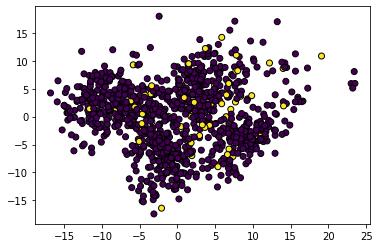

In [263]:
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_train,edgecolors='k')
plt.show()

IMBALANCE

Random Undersampling

In [264]:
# Random Undersampler
rus = RandomUnderSampler(random_state=42)
X_res, y_res = rus.fit_resample(X_train, y_train)
print('Resampled dataset shape %s' % Counter(y_res))

Resampled dataset shape Counter({0: 59, 1: 59})


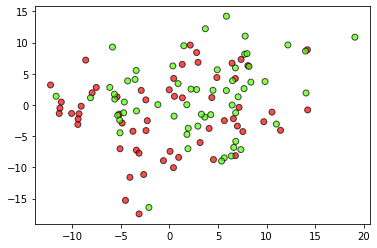

In [265]:
pca = PCA(n_components=2)
pca.fit(X_train)
X_pca = pca.transform(X_res)

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_res, cmap=plt.cm.prism, edgecolor='k', alpha=0.7)

plt.show()

In [266]:
classifier = learner_KNN.fit(X_res, y_res)
predictions = classifier.predict(X_test)
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.95      0.68      0.79       336
           1       0.07      0.40      0.12        20

    accuracy                           0.66       356
   macro avg       0.51      0.54      0.45       356
weighted avg       0.90      0.66      0.75       356



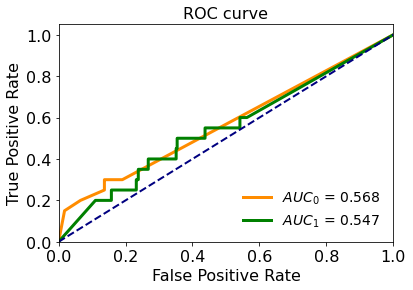

In [267]:


y_score = classifier.predict_proba(X_test)
fpr, tpr, _ = roc_curve(y_test, y_score[:, 1])
roc_auc = auc(fpr, tpr)

plt.plot(fpr0, tpr0, color='darkorange', lw=3, label='$AUC_0$ = %.3f' % (roc_auc0))
plt.plot(fpr, tpr, color='green', lw=3, label='$AUC_1$ = %.3f' % (roc_auc))

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.title('ROC curve', fontsize=16)
plt.legend(loc="lower right", fontsize=14, frameon=False)
plt.tick_params(axis='both', which='major', labelsize=16)
plt.show()













In [268]:
classifier = learner_DT.fit(X_res, y_res)
predictions = classifier.predict(X_test)
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.97      0.42      0.59       336
           1       0.07      0.75      0.13        20

    accuracy                           0.44       356
   macro avg       0.52      0.59      0.36       356
weighted avg       0.92      0.44      0.56       356



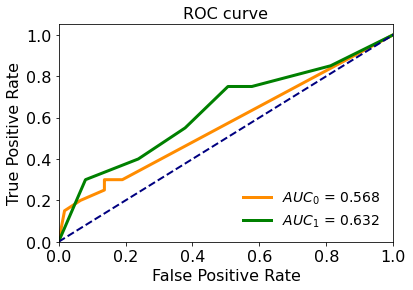

In [269]:


y_score = classifier.predict_proba(X_test)
fpr, tpr, _ = roc_curve(y_test, y_score[:, 1])
roc_auc = auc(fpr, tpr)

plt.plot(fpr0, tpr0, color='darkorange', lw=3, label='$AUC_0$ = %.3f' % (roc_auc0))
plt.plot(fpr, tpr, color='green', lw=3, label='$AUC_1$ = %.3f' % (roc_auc))

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.title('ROC curve', fontsize=16)
plt.legend(loc="lower right", fontsize=14, frameon=False)
plt.tick_params(axis='both', which='major', labelsize=16)
plt.show()













Condensed nearest neighbour

In [270]:
import warnings
warnings.simplefilter("ignore")

cnn = CondensedNearestNeighbour(random_state=42, n_jobs = -1)
X_res, y_res = cnn.fit_resample(X_train, y_train)
print('Resampled dataset shape %s' % Counter(y_res))

Resampled dataset shape Counter({0: 151, 1: 59})


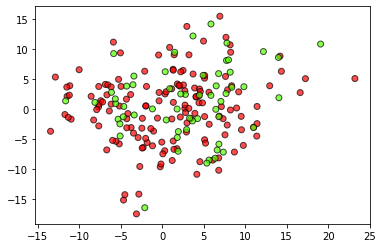

In [271]:
pca = PCA(n_components=2)
pca.fit(X_train)
X_pca = pca.transform(X_res)

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_res, cmap=plt.cm.prism, edgecolor='k', alpha=0.7)
plt.show()

In [272]:
classifier = learner_KNN.fit(X_res, y_res)
predictions = classifier.predict(X_test)
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.95      0.88      0.91       336
           1       0.07      0.15      0.10        20

    accuracy                           0.84       356
   macro avg       0.51      0.52      0.50       356
weighted avg       0.90      0.84      0.87       356



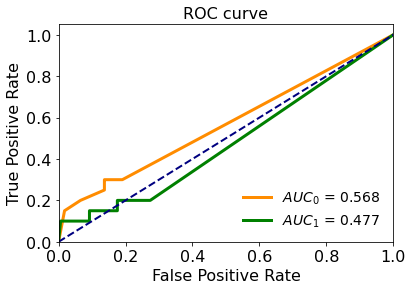

In [273]:


y_score = classifier.predict_proba(X_test)
fpr, tpr, _ = roc_curve(y_test, y_score[:, 1])
roc_auc = auc(fpr, tpr)

plt.plot(fpr0, tpr0, color='darkorange', lw=3, label='$AUC_0$ = %.3f' % (roc_auc0))
plt.plot(fpr, tpr, color='green', lw=3, label='$AUC_1$ = %.3f' % (roc_auc))

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.title('ROC curve', fontsize=16)
plt.legend(loc="lower right", fontsize=14, frameon=False)
plt.tick_params(axis='both', which='major', labelsize=16)
plt.show()













In [274]:
classifier = learner_DT.fit(X_res, y_res)
predictions = classifier.predict(X_test)
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.95      0.87      0.91       336
           1       0.12      0.30      0.17        20

    accuracy                           0.83       356
   macro avg       0.54      0.58      0.54       356
weighted avg       0.91      0.83      0.87       356



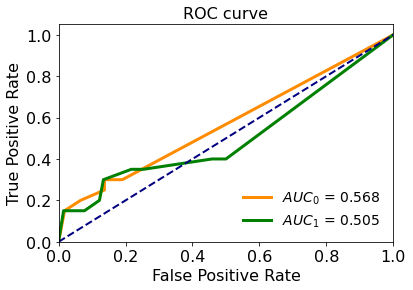

In [275]:


y_score = classifier.predict_proba(X_test)
fpr, tpr, _ = roc_curve(y_test, y_score[:, 1])
roc_auc = auc(fpr, tpr)

plt.plot(fpr0, tpr0, color='darkorange', lw=3, label='$AUC_0$ = %.3f' % (roc_auc0))
plt.plot(fpr, tpr, color='green', lw=3, label='$AUC_1$ = %.3f' % (roc_auc))

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.title('ROC curve', fontsize=16)
plt.legend(loc="lower right", fontsize=14, frameon=False)
plt.tick_params(axis='both', which='major', labelsize=16)
plt.show()













Tomek Links

In [276]:
tl = TomekLinks()
X_res, y_res = tl.fit_resample(X_train, y_train)
print('Resampled dataset shape %s' % Counter(y_res))

Resampled dataset shape Counter({0: 973, 1: 59})


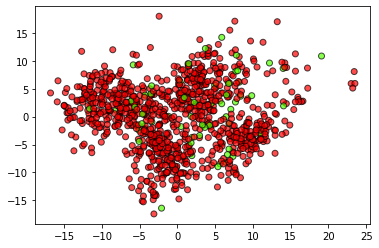

In [277]:
pca = PCA(n_components=2)
pca.fit(X_train)
X_pca = pca.transform(X_res)

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_res, cmap=plt.cm.prism, edgecolor='k', alpha=0.7)
plt.show()

In [278]:
classifier = learner_KNN.fit(X_res, y_res)
predictions = classifier.predict(X_test)
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.95      0.97      0.96       336
           1       0.17      0.10      0.12        20

    accuracy                           0.92       356
   macro avg       0.56      0.54      0.54       356
weighted avg       0.90      0.92      0.91       356



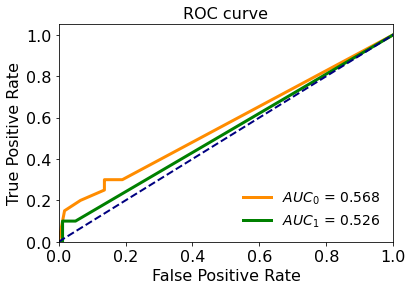

In [279]:


y_score = classifier.predict_proba(X_test)
fpr, tpr, _ = roc_curve(y_test, y_score[:, 1])
roc_auc = auc(fpr, tpr)

plt.plot(fpr0, tpr0, color='darkorange', lw=3, label='$AUC_0$ = %.3f' % (roc_auc0))
plt.plot(fpr, tpr, color='green', lw=3, label='$AUC_1$ = %.3f' % (roc_auc))

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.title('ROC curve', fontsize=16)
plt.legend(loc="lower right", fontsize=14, frameon=False)
plt.tick_params(axis='both', which='major', labelsize=16)
plt.show()













In [280]:
classifier = learner_DT.fit(X_res, y_res)
predictions = classifier.predict(X_test)
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.95      0.98      0.96       336
           1       0.27      0.15      0.19        20

    accuracy                           0.93       356
   macro avg       0.61      0.56      0.58       356
weighted avg       0.91      0.93      0.92       356



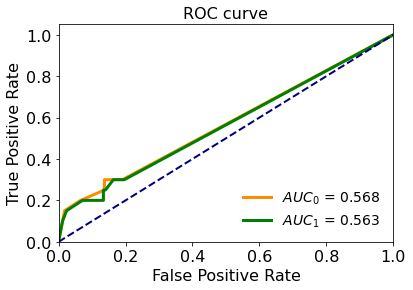

In [281]:


y_score = classifier.predict_proba(X_test)
fpr, tpr, _ = roc_curve(y_test, y_score[:, 1])
roc_auc = auc(fpr, tpr)

plt.plot(fpr0, tpr0, color='darkorange', lw=3, label='$AUC_0$ = %.3f' % (roc_auc0))
plt.plot(fpr, tpr, color='green', lw=3, label='$AUC_1$ = %.3f' % (roc_auc))

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.title('ROC curve', fontsize=16)
plt.legend(loc="lower right", fontsize=14, frameon=False)
plt.tick_params(axis='both', which='major', labelsize=16)
plt.show()













Edited Nearest Neighbour

In [282]:
enn = EditedNearestNeighbours()
X_res, y_res = enn.fit_resample(X_train, y_train)
print('Resampled dataset shape %s' % Counter(y_res))

Resampled dataset shape Counter({0: 927, 1: 59})


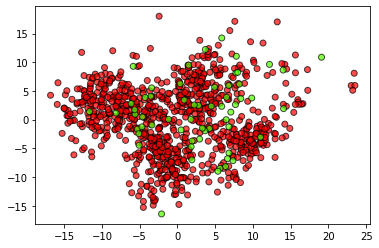

In [283]:
pca = PCA(n_components=2)
pca.fit(X_train)
X_pca = pca.transform(X_res)

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_res, cmap=plt.cm.prism, edgecolor='k', alpha=0.7)
plt.show()

In [284]:
classifier = learner_KNN.fit(X_res, y_res)
predictions = classifier.predict(X_test)
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.95      0.96      0.95       336
           1       0.13      0.10      0.11        20

    accuracy                           0.91       356
   macro avg       0.54      0.53      0.53       356
weighted avg       0.90      0.91      0.91       356



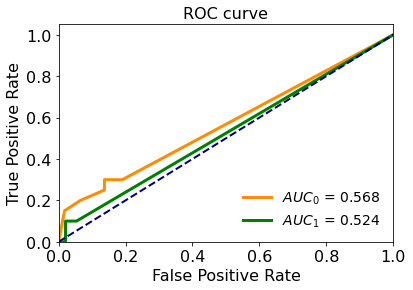

In [285]:


y_score = classifier.predict_proba(X_test)
fpr, tpr, _ = roc_curve(y_test, y_score[:, 1])
roc_auc = auc(fpr, tpr)

plt.plot(fpr0, tpr0, color='darkorange', lw=3, label='$AUC_0$ = %.3f' % (roc_auc0))
plt.plot(fpr, tpr, color='green', lw=3, label='$AUC_1$ = %.3f' % (roc_auc))

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.title('ROC curve', fontsize=16)
plt.legend(loc="lower right", fontsize=14, frameon=False)
plt.tick_params(axis='both', which='major', labelsize=16)
plt.show()













In [286]:
classifier = learner_DT.fit(X_res, y_res)
predictions = classifier.predict(X_test)
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.94      0.96      0.95       336
           1       0.07      0.05      0.06        20

    accuracy                           0.91       356
   macro avg       0.51      0.51      0.51       356
weighted avg       0.90      0.91      0.90       356



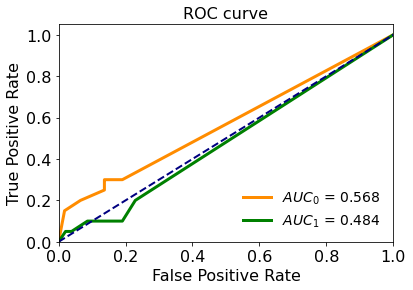

In [287]:


y_score = classifier.predict_proba(X_test)
fpr, tpr, _ = roc_curve(y_test, y_score[:, 1])
roc_auc = auc(fpr, tpr)

plt.plot(fpr0, tpr0, color='darkorange', lw=3, label='$AUC_0$ = %.3f' % (roc_auc0))
plt.plot(fpr, tpr, color='green', lw=3, label='$AUC_1$ = %.3f' % (roc_auc))

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.title('ROC curve', fontsize=16)
plt.legend(loc="lower right", fontsize=14, frameon=False)
plt.tick_params(axis='both', which='major', labelsize=16)
plt.show()













Cluster Centroids

In [288]:
from sklearn.cluster import KMeans
from imblearn.under_sampling import ClusterCentroids

cc = ClusterCentroids(
    estimator=KMeans(n_init=1, random_state=0), random_state=42 # minibatch version is faster than Kmeans
)
X_res, y_res = cc.fit_resample(X_train, y_train)
print('Resampled dataset shape %s' % Counter(y_res))

Resampled dataset shape Counter({0: 59, 1: 59})


In [289]:
classifier = learner_KNN.fit(X_res, y_res)
predictions = classifier.predict(X_test)
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.95      0.96      0.95       336
           1       0.12      0.10      0.11        20

    accuracy                           0.91       356
   macro avg       0.53      0.53      0.53       356
weighted avg       0.90      0.91      0.90       356



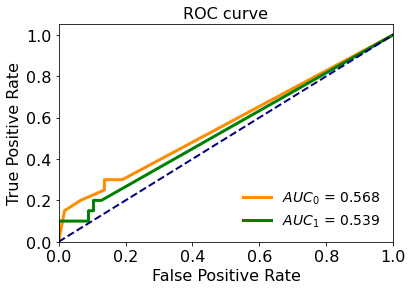

In [290]:


y_score = classifier.predict_proba(X_test)
fpr, tpr, _ = roc_curve(y_test, y_score[:, 1])
roc_auc = auc(fpr, tpr)

plt.plot(fpr0, tpr0, color='darkorange', lw=3, label='$AUC_0$ = %.3f' % (roc_auc0))
plt.plot(fpr, tpr, color='green', lw=3, label='$AUC_1$ = %.3f' % (roc_auc))

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.title('ROC curve', fontsize=16)
plt.legend(loc="lower right", fontsize=14, frameon=False)
plt.tick_params(axis='both', which='major', labelsize=16)
plt.show()













In [291]:
classifier = learner_DT.fit(X_res, y_res)
predictions = classifier.predict(X_test)
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.98      0.43      0.59       336
           1       0.08      0.85      0.15        20

    accuracy                           0.45       356
   macro avg       0.53      0.64      0.37       356
weighted avg       0.93      0.45      0.57       356



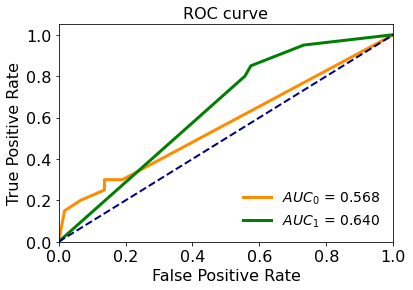

In [292]:


y_score = classifier.predict_proba(X_test)
fpr, tpr, _ = roc_curve(y_test, y_score[:, 1])
roc_auc = auc(fpr, tpr)

plt.plot(fpr0, tpr0, color='darkorange', lw=3, label='$AUC_0$ = %.3f' % (roc_auc0))
plt.plot(fpr, tpr, color='green', lw=3, label='$AUC_1$ = %.3f' % (roc_auc))

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.title('ROC curve', fontsize=16)
plt.legend(loc="lower right", fontsize=14, frameon=False)
plt.tick_params(axis='both', which='major', labelsize=16)
plt.show()













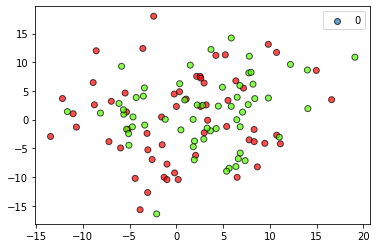

In [293]:
pca = PCA(n_components=2)
pca.fit(X_train)
X_pca = pca.transform(X_res)

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_res, cmap=plt.cm.prism, edgecolor='k', alpha=0.7)
plt.legend([0,1])
plt.show()

# Esperimento 2: Oversampling + Dim.Reduction + New classification with tuned hyperparameters

Random oversampler

In [294]:
ros = RandomOverSampler(random_state=42)
X_res, y_res = ros.fit_resample(X_train, y_train)
print('Resampled dataset shape %s' % Counter(y_res))

Resampled dataset shape Counter({0: 984, 1: 984})


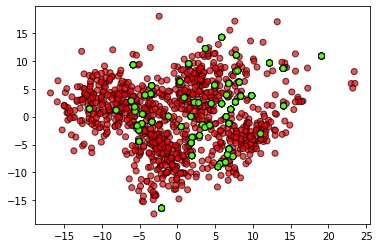

In [295]:
pca = PCA(n_components=2)
pca.fit(X_train)
X_pca = pca.transform(X_res)

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_res, cmap=plt.cm.prism, edgecolor='k', alpha=0.7)
plt.show()

In [296]:
classifier = learner_KNN.fit(X_res, y_res)
predictions = classifier.predict(X_test)
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.95      0.97      0.96       336
           1       0.18      0.10      0.13        20

    accuracy                           0.92       356
   macro avg       0.56      0.54      0.54       356
weighted avg       0.90      0.92      0.91       356



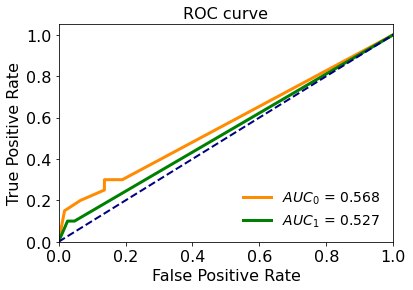

In [297]:


y_score = classifier.predict_proba(X_test)
fpr, tpr, _ = roc_curve(y_test, y_score[:, 1])
roc_auc = auc(fpr, tpr)

plt.plot(fpr0, tpr0, color='darkorange', lw=3, label='$AUC_0$ = %.3f' % (roc_auc0))
plt.plot(fpr, tpr, color='green', lw=3, label='$AUC_1$ = %.3f' % (roc_auc))

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.title('ROC curve', fontsize=16)
plt.legend(loc="lower right", fontsize=14, frameon=False)
plt.tick_params(axis='both', which='major', labelsize=16)
plt.show()













In [298]:
classifier = learner_DT.fit(X_res, y_res)
predictions = classifier.predict(X_test)
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.95      0.86      0.90       336
           1       0.08      0.20      0.11        20

    accuracy                           0.83       356
   macro avg       0.51      0.53      0.51       356
weighted avg       0.90      0.83      0.86       356



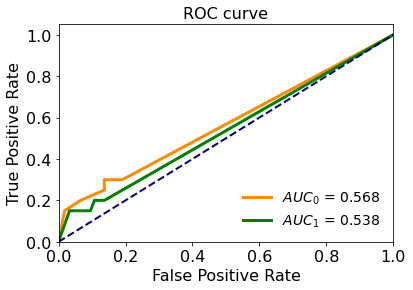

In [299]:


y_score = classifier.predict_proba(X_test)
fpr, tpr, _ = roc_curve(y_test, y_score[:, 1])
roc_auc = auc(fpr, tpr)

plt.plot(fpr0, tpr0, color='darkorange', lw=3, label='$AUC_0$ = %.3f' % (roc_auc0))
plt.plot(fpr, tpr, color='green', lw=3, label='$AUC_1$ = %.3f' % (roc_auc))

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.title('ROC curve', fontsize=16)
plt.legend(loc="lower right", fontsize=14, frameon=False)
plt.tick_params(axis='both', which='major', labelsize=16)
plt.show()













smote

In [300]:
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X_train, y_train)
print('Resampled dataset shape %s' % Counter(y_res))

Resampled dataset shape Counter({0: 984, 1: 984})


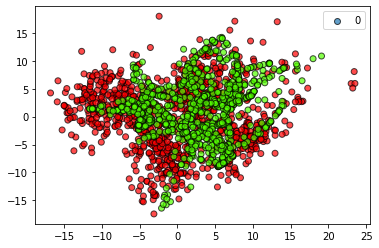

In [301]:
pca = PCA(n_components=2)
pca.fit(X_train)
X_pca = pca.transform(X_res)

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_res, cmap=plt.cm.prism, edgecolor='k', alpha=0.7)
plt.legend([0,1])
plt.show()

In [302]:
classifier = learner_KNN.fit(X_res, y_res)
predictions = classifier.predict(X_test)
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.95      0.80      0.87       336
           1       0.10      0.35      0.15        20

    accuracy                           0.78       356
   macro avg       0.52      0.58      0.51       356
weighted avg       0.91      0.78      0.83       356



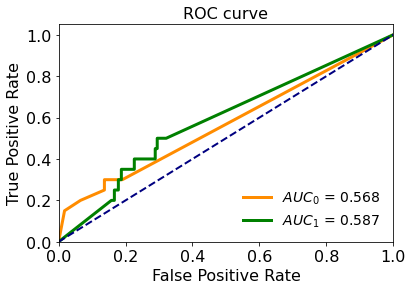

In [303]:


y_score = classifier.predict_proba(X_test)
fpr, tpr, _ = roc_curve(y_test, y_score[:, 1])
roc_auc = auc(fpr, tpr)

plt.plot(fpr0, tpr0, color='darkorange', lw=3, label='$AUC_0$ = %.3f' % (roc_auc0))
plt.plot(fpr, tpr, color='green', lw=3, label='$AUC_1$ = %.3f' % (roc_auc))

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.title('ROC curve', fontsize=16)
plt.legend(loc="lower right", fontsize=14, frameon=False)
plt.tick_params(axis='both', which='major', labelsize=16)
plt.show()













In [304]:
classifier = learner_DT.fit(X_res, y_res)
predictions = classifier.predict(X_test)
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.96      0.90      0.93       336
           1       0.16      0.30      0.21        20

    accuracy                           0.87       356
   macro avg       0.56      0.60      0.57       356
weighted avg       0.91      0.87      0.89       356



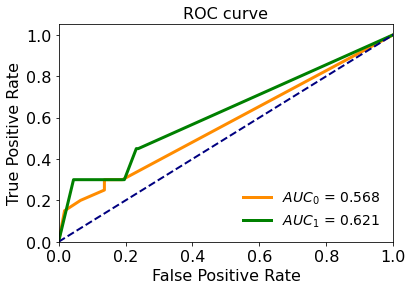

In [305]:


y_score = classifier.predict_proba(X_test)
fpr, tpr, _ = roc_curve(y_test, y_score[:, 1])
roc_auc = auc(fpr, tpr)

plt.plot(fpr0, tpr0, color='darkorange', lw=3, label='$AUC_0$ = %.3f' % (roc_auc0))
plt.plot(fpr, tpr, color='green', lw=3, label='$AUC_1$ = %.3f' % (roc_auc))

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.title('ROC curve', fontsize=16)
plt.legend(loc="lower right", fontsize=14, frameon=False)
plt.tick_params(axis='both', which='major', labelsize=16)
plt.show()













adasyn

In [306]:
ada = ADASYN(random_state=42)
X_res, y_res = ada.fit_resample(X_train, y_train)
print('Resampled dataset shape %s' % Counter(y_res))

Resampled dataset shape Counter({1: 994, 0: 984})


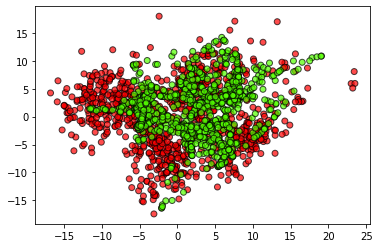

In [307]:
pca = PCA(n_components=2)
pca.fit(X_train)
X_pca = pca.transform(X_res)

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_res, cmap=plt.cm.prism, edgecolor='k', alpha=0.7)
plt.show()

In [308]:
classifier = learner_KNN.fit(X_res, y_res)
predictions = classifier.predict(X_test)
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.95      0.81      0.88       336
           1       0.07      0.25      0.11        20

    accuracy                           0.78       356
   macro avg       0.51      0.53      0.49       356
weighted avg       0.90      0.78      0.83       356



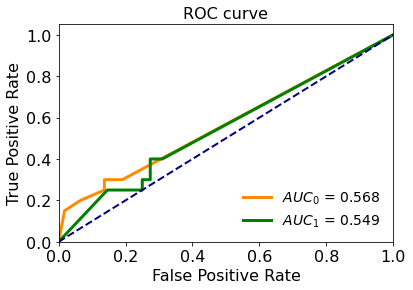

In [309]:


y_score = classifier.predict_proba(X_test)
fpr, tpr, _ = roc_curve(y_test, y_score[:, 1])
roc_auc = auc(fpr, tpr)

plt.plot(fpr0, tpr0, color='darkorange', lw=3, label='$AUC_0$ = %.3f' % (roc_auc0))
plt.plot(fpr, tpr, color='green', lw=3, label='$AUC_1$ = %.3f' % (roc_auc))

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.title('ROC curve', fontsize=16)
plt.legend(loc="lower right", fontsize=14, frameon=False)
plt.tick_params(axis='both', which='major', labelsize=16)
plt.show()













In [310]:
classifier = learner_DT.fit(X_res, y_res)
predictions = classifier.predict(X_test)
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.96      0.88      0.92       336
           1       0.18      0.45      0.26        20

    accuracy                           0.86       356
   macro avg       0.57      0.67      0.59       356
weighted avg       0.92      0.86      0.88       356



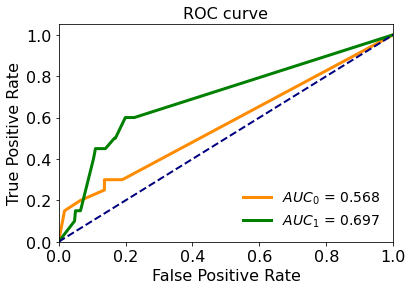

In [311]:


y_score = classifier.predict_proba(X_test)
fpr, tpr, _ = roc_curve(y_test, y_score[:, 1])
roc_auc = auc(fpr, tpr)

plt.plot(fpr0, tpr0, color='darkorange', lw=3, label='$AUC_0$ = %.3f' % (roc_auc0))
plt.plot(fpr, tpr, color='green', lw=3, label='$AUC_1$ = %.3f' % (roc_auc))

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.title('ROC curve', fontsize=16)
plt.legend(loc="lower right", fontsize=14, frameon=False)
plt.tick_params(axis='both', which='major', labelsize=16)
plt.show()













## Algoritmic sampling

Class weight

              precision    recall  f1-score   support

           0       0.95      0.85      0.89       336
           1       0.07      0.20      0.11        20

    accuracy                           0.81       356
   macro avg       0.51      0.52      0.50       356
weighted avg       0.90      0.81      0.85       356



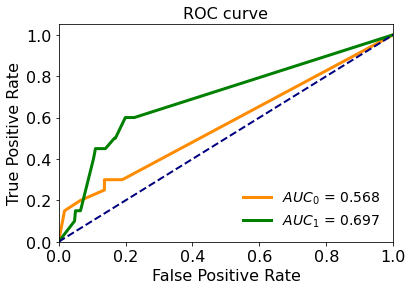

In [312]:
clf = DecisionTreeClassifier(max_depth=15,min_samples_leaf=10,min_samples_split=15,class_weight={0:1, 1: 5}, random_state=42)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print(classification_report(y_test, y_pred))

y_score = classifier.predict_proba(X_test)
fpr, tpr, _ = roc_curve(y_test, y_score[:, 1])
roc_auc = auc(fpr, tpr)

plt.plot(fpr0, tpr0, color='darkorange', lw=3, label='$AUC_0$ = %.3f' % (roc_auc0))
plt.plot(fpr, tpr, color='green', lw=3, label='$AUC_1$ = %.3f' % (roc_auc))

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.title('ROC curve', fontsize=16)
plt.legend(loc="lower right", fontsize=14, frameon=False)
plt.tick_params(axis='both', which='major', labelsize=16)
plt.show()

Meta-cost -sensitive-classifier

In [313]:
import sys
import joblib
import six
import sklearn.ensemble._base
sys.modules['sklearn.externals.joblib'] = joblib
sys.modules['sklearn.externals.six'] = six
sys.modules['sklearn.externals.six.moves'] = six.moves
sys.modules['sklearn.ensemble.base'] = sklearn.ensemble._base

!pip install costcla
from costcla.models import CostSensitiveDecisionTreeClassifier
from costcla.metrics import savings_score

In [314]:
cost = [1, 10, 0, 0]  # if we want to apply this to all records we have to build a matrix of len(training)
cost_mat = np.array([cost] * len(X_train))
cost_mat.shape

(1043, 4)

              precision    recall  f1-score   support

           0       0.95      0.94      0.94       336
           1       0.09      0.10      0.09        20

    accuracy                           0.89       356
   macro avg       0.52      0.52      0.52       356
weighted avg       0.90      0.89      0.89       356



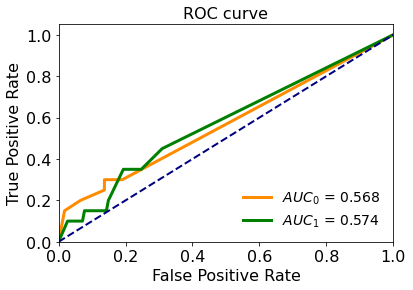

In [315]:
clf = CostSensitiveDecisionTreeClassifier()
clf.fit(X_train, y_train, cost_mat)

y_pred = clf.predict(X_test)

print(classification_report(y_test, y_pred))

y_score = clf.predict_proba(X_test)
fpr, tpr, _ = roc_curve(y_test, y_score[:, 1])
roc_auc = auc(fpr, tpr)

plt.plot(fpr0, tpr0, color='darkorange', lw=3, label='$AUC_0$ = %.3f' % (roc_auc0))
plt.plot(fpr, tpr, color='green', lw=3, label='$AUC_1$ = %.3f' % (roc_auc))

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.title('ROC curve', fontsize=16)
plt.legend(loc="lower right", fontsize=14, frameon=False)
plt.tick_params(axis='both', which='major', labelsize=16)
plt.show()

# Dimensionality Reduction (Feature Selection)

In [316]:
from sklearn.feature_selection import VarianceThreshold

In [317]:
#Let's test different Threshold for DT and KNN
thresholds = [0.02, 0.04, 0.06, 0.08, 0.1, 0.12, 0.15, 0.16, 0.25, 1]
for i in thresholds:
    sel = VarianceThreshold(i)
    print(str(i))
    X_train_sel = sel.fit_transform(X_train)
    print(X_train_sel.shape)
    X_test_sel = sel.transform(X_test)

    learner= DecisionTreeClassifier(max_depth=15,min_samples_leaf=10,min_samples_split=15)
    learner.fit(X_train_sel, y_train)
    y_pred = learner.predict(X_test_sel)
    print('DT - Accuracy %s' % accuracy_score(y_test, y_pred))
    print('DT - F1 Score %s' % f1_score(y_test, y_pred,average="macro"))

    learner= KNeighborsClassifier(n_neighbors= 2, metric= 'euclidean', weights= 'distance')
    learner.fit(X_train_sel, y_train)
    y_pred = learner.predict(X_test_sel)
    print('KNN - Accuracy %s' % accuracy_score(y_test, y_pred))
    print('KNN - F1 Score %s' % f1_score(y_test, y_pred,average="macro"))

0.02
(1043, 264)
DT - Accuracy 0.9325842696629213
DT - F1 Score 0.5824046920821114
KNN - Accuracy 0.9241573033707865
KNN - F1 Score 0.5446923404860026
0.04
(1043, 264)
DT - Accuracy 0.9353932584269663
DT - F1 Score 0.5866107941636796
KNN - Accuracy 0.9241573033707865
KNN - F1 Score 0.5446923404860026
0.06
(1043, 264)
DT - Accuracy 0.9353932584269663
DT - F1 Score 0.5866107941636796
KNN - Accuracy 0.9241573033707865
KNN - F1 Score 0.5446923404860026
0.08
(1043, 262)
DT - Accuracy 0.9325842696629213
DT - F1 Score 0.5824046920821114
KNN - Accuracy 0.9241573033707865
KNN - F1 Score 0.5446923404860026
0.1
(1043, 262)
DT - Accuracy 0.9353932584269663
DT - F1 Score 0.5866107941636796
KNN - Accuracy 0.9241573033707865
KNN - F1 Score 0.5446923404860026
0.12
(1043, 261)
DT - Accuracy 0.9353932584269663
DT - F1 Score 0.6121453270806688
KNN - Accuracy 0.9241573033707865
KNN - F1 Score 0.5446923404860026
0.15
(1043, 256)
DT - Accuracy 0.9297752808988764
DT - F1 Score 0.5784188337833357
KNN - Accura

In [318]:
# Proviamo lo stesso esperimento però sui dati non normalizzati

df_train_pure=pd.read_csv("../Dataset_prepared/Prepared_train.csv")
df_test_pure=pd.read_csv("../Dataset_prepared/Prepared_test.csv")

df_train_pure.drop('actor',axis=1,inplace=True)
df_train_pure.drop('filename',axis=1,inplace=True)

df_test_pure.drop('actor',axis=1,inplace=True)
df_test_pure.drop('filename',axis=1,inplace=True)

le=preprocessing.LabelEncoder()
c = ["statement","repetition","sex","emotional_intensity","vocal_channel"]
for i in c:
    df_train_pure[i]=le.fit_transform(df_train_pure[i])

for i in c:
    df_test_pure[i]=le.fit_transform(df_test_pure[i])
df_train_pure = pd.get_dummies(df_train_pure, columns=categorical_col)

df_test_pure = pd.get_dummies(df_test_pure, columns=categorical_col)   
col=[x for x in df_train_pure.columns if x!="emotional_intensity"]


   
X_train_pure=df_train_pure[col].values
y_train_pure = np.array(df_train_pure["emotional_intensity"])

X_test_pure=df_test_pure[col].values
y_test_pure = np.array(df_test_pure["emotional_intensity"])



#Let's test different Threshold for DT and KNN
thresholds = [0.02, 0.04, 0.06, 0.08, 0.1, 0.12, 0.15, 0.16, 0.25,0.50,0.70]
for i in thresholds:
    sel = VarianceThreshold(i)
    print(str(i))
    X_train_sel = sel.fit_transform(X_train_pure)
    print(X_train_sel.shape)
    X_test_sel = sel.transform(X_test_pure)

    learner= DecisionTreeClassifier(max_depth=15,min_samples_leaf=10,min_samples_split=15)
    learner.fit(X_train_sel, y_train_pure)
    y_pred = learner.predict(X_test_sel)
    print('DT - Accuracy %s' % accuracy_score(y_test_pure, y_pred))
    print('DT - F1 Score %s' % f1_score(y_test_pure, y_pred,average="macro"))

    learner= KNeighborsClassifier(n_neighbors= 2, metric= 'euclidean', weights= 'distance')
    learner.fit(X_train_sel, y_train_pure)
    y_pred = learner.predict(X_test_sel)
    print('KNN - Accuracy %s' % accuracy_score(y_test_pure, y_pred))
    print('KNN - F1 Score %s' % f1_score(y_test_pure, y_pred,average="macro"))




0.02
(1828, 191)
DT - Accuracy 0.7035256410256411
DT - F1 Score 0.7028839100724515
KNN - Accuracy 0.5576923076923077
KNN - F1 Score 0.5487170887137347
0.04
(1828, 187)
DT - Accuracy 0.6826923076923077
DT - F1 Score 0.6825325042396835
KNN - Accuracy 0.5576923076923077
KNN - F1 Score 0.5487170887137347
0.06
(1828, 182)
DT - Accuracy 0.6955128205128205
DT - F1 Score 0.6953125
KNN - Accuracy 0.5576923076923077
KNN - F1 Score 0.5487170887137347
0.08
(1828, 178)
DT - Accuracy 0.719551282051282
DT - F1 Score 0.7189442392577244
KNN - Accuracy 0.5576923076923077
KNN - F1 Score 0.5487170887137347
0.1
(1828, 177)
DT - Accuracy 0.7211538461538461
DT - F1 Score 0.7201158966004351
KNN - Accuracy 0.5576923076923077
KNN - F1 Score 0.5487170887137347
0.12
(1828, 174)
DT - Accuracy 0.7275641025641025
DT - F1 Score 0.7268457481872117
KNN - Accuracy 0.5576923076923077
KNN - F1 Score 0.5487170887137347
0.15
(1828, 165)
DT - Accuracy 0.6826923076923077
DT - F1 Score 0.6793189368770762
KNN - Accuracy 0.55769

Univariate Feature Selection 

In [319]:
from sklearn.feature_selection import SelectKBest


In [320]:
#Let's test different Threshold for DT and KNN
for i in range(20, 60):
    sel = SelectKBest(k=i)
    print(str(i))
    X_train_sel = sel.fit_transform(X_train, y_train)
    print(X_train_sel.shape)
    X_test_sel = sel.transform(X_test)

    learner= DecisionTreeClassifier(max_depth=15,min_samples_leaf=10,min_samples_split=15)
    learner.fit(X_train_sel, y_train)
    y_pred = learner.predict(X_test_sel)
    print('DT - Accuracy %s' % accuracy_score(y_test, y_pred))
    print('DT - F1 Score %s' % f1_score(y_test, y_pred,average="macro"))

    learner= KNeighborsClassifier(n_neighbors= 2, metric= 'euclidean', weights= 'distance')
    learner.fit(X_train_sel, y_train)
    y_pred = learner.predict(X_test_sel)
    print('KNN - Accuracy %s' % accuracy_score(y_test, y_pred))
    print('KNN - F1 Score %s' % f1_score(y_test, y_pred,average="macro"))

20
(1043, 20)
DT - Accuracy 0.9353932584269663
DT - F1 Score 0.5866107941636796
KNN - Accuracy 0.901685393258427
KNN - F1 Score 0.5011011011011011
21
(1043, 21)
DT - Accuracy 0.9353932584269663
DT - F1 Score 0.5866107941636796
KNN - Accuracy 0.898876404494382
KNN - F1 Score 0.4996095580196783
22
(1043, 22)
DT - Accuracy 0.9353932584269663
DT - F1 Score 0.5866107941636796
KNN - Accuracy 0.898876404494382
KNN - F1 Score 0.4996095580196783
23
(1043, 23)
DT - Accuracy 0.9353932584269663
DT - F1 Score 0.5866107941636796
KNN - Accuracy 0.9101123595505618
KNN - F1 Score 0.5552084960174918
24
(1043, 24)
DT - Accuracy 0.9353932584269663
DT - F1 Score 0.5866107941636796
KNN - Accuracy 0.9129213483146067
KNN - F1 Score 0.5581181181181181
25
(1043, 25)
DT - Accuracy 0.9353932584269663
DT - F1 Score 0.5866107941636796
KNN - Accuracy 0.9073033707865169
KNN - F1 Score 0.552405989255915
26
(1043, 26)
DT - Accuracy 0.9353932584269663
DT - F1 Score 0.5866107941636796
KNN - Accuracy 0.9129213483146067
KN

Selkect from model 

In [321]:
from sklearn.feature_selection import SelectFromModel


In [322]:
sel = SelectFromModel(DecisionTreeClassifier(max_depth=10, min_samples_split=2, min_samples_leaf=20))
X_train_sel = sel.fit_transform(X_train, y_train)
print(f"New dimension:{X_train_sel.shape}\n")

X_test_sel = sel.transform(X_test)
clf =KNeighborsClassifier(n_neighbors= 2, metric= 'euclidean', weights= 'distance')
clf.fit(X_train_sel, y_train)
y_pred = clf.predict(X_test_sel)
print(classification_report(y_test, y_pred))

# Ho fatto selezione sul modello del decision tree e testato il knn nella nuova dimensione

New dimension:(1043, 13)

              precision    recall  f1-score   support

           0       0.95      0.96      0.95       336
           1       0.13      0.10      0.11        20

    accuracy                           0.91       356
   macro avg       0.54      0.53      0.53       356
weighted avg       0.90      0.91      0.91       356



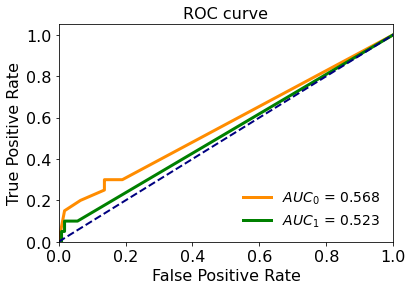

In [323]:
y_score = clf.predict_proba(X_test_sel)
fpr, tpr, _ = roc_curve(y_test, y_score[:, 1])
roc_auc = auc(fpr, tpr)

plt.plot(fpr0, tpr0, color='darkorange', lw=3, label='$AUC_0$ = %.3f' % (roc_auc0))
plt.plot(fpr, tpr, color='green', lw=3, label='$AUC_1$ = %.3f' % (roc_auc))

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.title('ROC curve', fontsize=16)
plt.legend(loc="lower right", fontsize=14, frameon=False)
plt.tick_params(axis='both', which='major', labelsize=16)
plt.show()

In [324]:
clf= DecisionTreeClassifier(max_depth=15,min_samples_leaf=10,min_samples_split=15)
clf.fit(X_train_sel, y_train)
y_pred = clf.predict(X_test_sel)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.93      0.94       336
           1       0.12      0.15      0.13        20

    accuracy                           0.89       356
   macro avg       0.53      0.54      0.54       356
weighted avg       0.90      0.89      0.89       356



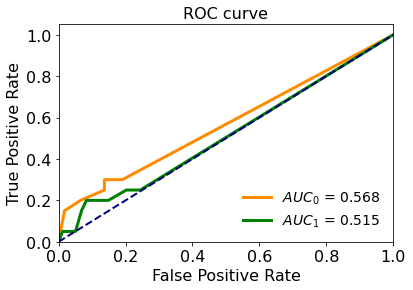

In [325]:
y_score = clf.predict_proba(X_test_sel)
fpr, tpr, _ = roc_curve(y_test, y_score[:, 1])
roc_auc = auc(fpr, tpr)

plt.plot(fpr0, tpr0, color='darkorange', lw=3, label='$AUC_0$ = %.3f' % (roc_auc0))
plt.plot(fpr, tpr, color='green', lw=3, label='$AUC_1$ = %.3f' % (roc_auc))

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.title('ROC curve', fontsize=16)
plt.legend(loc="lower right", fontsize=14, frameon=False)
plt.tick_params(axis='both', which='major', labelsize=16)
plt.show()

Recursive Feature elimination

In [326]:
from sklearn.feature_selection import RFE

In [327]:
#Let's test different k range for DT and KNN
for i in range(20, 60):
    print(str(i))

    sel = RFE(DecisionTreeClassifier(max_depth=15,min_samples_leaf=10,min_samples_split=15), n_features_to_select=i)
    X_train_sel = sel.fit_transform(X_train, y_train)
    print(f" DT New dimension: {X_train_sel.shape}")
    X_test_sel = sel.transform(X_test)

    learner= DecisionTreeClassifier(max_depth=15,min_samples_leaf=10,min_samples_split=15)
    learner.fit(X_train_sel, y_train)
    y_pred = learner.predict(X_test_sel)
    print('DT - Accuracy %s' % accuracy_score(y_test, y_pred))
    print('DT - F1 Score %s' % f1_score(y_test, y_pred,average="macro"))

    learner= KNeighborsClassifier(n_neighbors= 2, metric= 'euclidean', weights= 'distance')
    learner.fit(X_train_sel, y_train)
    y_pred = learner.predict(X_test_sel)
    print('KNN - Accuracy %s' % accuracy_score(y_test, y_pred))
    print('KNN - F1 Score %s' % f1_score(y_test, y_pred,average="macro"))

20
 DT New dimension: (1043, 20)
DT - Accuracy 0.9353932584269663
DT - F1 Score 0.5866107941636796
KNN - Accuracy 0.8904494382022472
KNN - F1 Score 0.5173636458441965
21
 DT New dimension: (1043, 21)
DT - Accuracy 0.9353932584269663
DT - F1 Score 0.6121453270806688
KNN - Accuracy 0.898876404494382
KNN - F1 Score 0.5232142857142857
22
 DT New dimension: (1043, 22)
DT - Accuracy 0.9353932584269663
DT - F1 Score 0.6121453270806688
KNN - Accuracy 0.898876404494382
KNN - F1 Score 0.5232142857142857
23
 DT New dimension: (1043, 23)
DT - Accuracy 0.9353932584269663
DT - F1 Score 0.5866107941636796
KNN - Accuracy 0.901685393258427
KNN - F1 Score 0.5252790795138492
24
 DT New dimension: (1043, 24)
DT - Accuracy 0.9353932584269663
DT - F1 Score 0.6121453270806688
KNN - Accuracy 0.9044943820224719
KNN - F1 Score 0.5497023809523809
25
 DT New dimension: (1043, 25)
DT - Accuracy 0.9353932584269663
DT - F1 Score 0.557285752906191
KNN - Accuracy 0.8904494382022472
KNN - F1 Score 0.5173636458441965
26

# DIMENSIONALITY REDUCTION ( FEATURE PROJECTION)

PCA

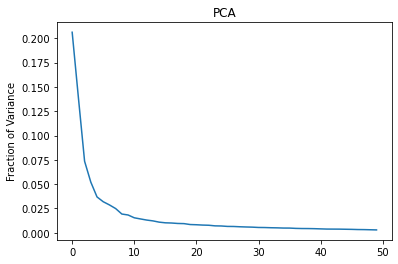

In [328]:
plt.plot(PCA(n_components=50).fit(X_train,y_train).explained_variance_ratio_)
plt.title("PCA")
plt.ylabel("Fraction of Variance")
plt.show()

In [329]:
pca = PCA(n_components=30)
pca.fit(X_train)
X_train_pca = pca.transform(X_train)

In [330]:
X_test_pca = pca.transform(X_test)
clf = DecisionTreeClassifier(max_depth=15,min_samples_leaf=10,min_samples_split=15)
clf.fit(X_train_pca, y_train)
y_pred = clf.predict(X_test_pca)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      1.00      0.97       336
           1       1.00      0.10      0.18        20

    accuracy                           0.95       356
   macro avg       0.97      0.55      0.58       356
weighted avg       0.95      0.95      0.93       356



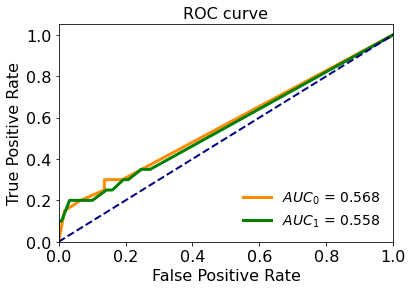

In [331]:
y_score = clf.predict_proba(X_test_pca)
fpr, tpr, _ = roc_curve(y_test, y_score[:, 1])
roc_auc = auc(fpr, tpr)

plt.plot(fpr0, tpr0, color='darkorange', lw=3, label='$AUC_0$ = %.3f' % (roc_auc0))
plt.plot(fpr, tpr, color='green', lw=3, label='$AUC_1$ = %.3f' % (roc_auc))

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.title('ROC curve', fontsize=16)
plt.legend(loc="lower right", fontsize=14, frameon=False)
plt.tick_params(axis='both', which='major', labelsize=16)
plt.show()



In [332]:
X_test_pca = pca.transform(X_test)
clf = KNeighborsClassifier(n_neighbors= 2, metric= 'euclidean', weights= 'distance')
clf.fit(X_train_pca, y_train)
y_pred = clf.predict(X_test_pca)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.97      0.96       336
           1       0.08      0.05      0.06        20

    accuracy                           0.92       356
   macro avg       0.51      0.51      0.51       356
weighted avg       0.90      0.92      0.91       356



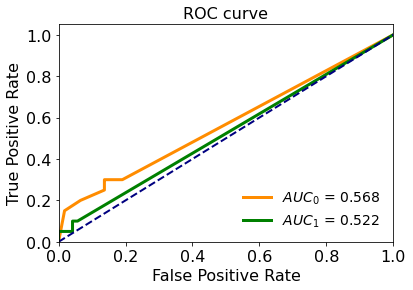

In [333]:
y_score = clf.predict_proba(X_test_pca)
fpr, tpr, _ = roc_curve(y_test, y_score[:, 1])
roc_auc = auc(fpr, tpr)

plt.plot(fpr0, tpr0, color='darkorange', lw=3, label='$AUC_0$ = %.3f' % (roc_auc0))
plt.plot(fpr, tpr, color='green', lw=3, label='$AUC_1$ = %.3f' % (roc_auc))

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.title('ROC curve', fontsize=16)
plt.legend(loc="lower right", fontsize=14, frameon=False)
plt.tick_params(axis='both', which='major', labelsize=16)
plt.show()



Random subspace projection 

In [334]:
from sklearn import random_projection

rsp = random_projection.GaussianRandomProjection(n_components=30, random_state=0)
X_train_rsp = rsp.fit_transform(X_train)
X_train_rsp.shape

(1043, 30)

In [335]:
X_test_rsp = rsp.transform(X_test)
clf =DecisionTreeClassifier(max_depth=15,min_samples_leaf=10,min_samples_split=15)
clf.fit(X_train_rsp, y_train)
y_pred = clf.predict(X_test_rsp)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.98      0.96       336
           1       0.12      0.05      0.07        20

    accuracy                           0.93       356
   macro avg       0.54      0.51      0.52       356
weighted avg       0.90      0.93      0.91       356



In [336]:
clf = KNeighborsClassifier(n_neighbors= 2, metric= 'euclidean', weights= 'distance')
clf.fit(X_train_rsp, y_train)
y_pred = clf.predict(X_test_rsp)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.98      0.96       336
           1       0.12      0.05      0.07        20

    accuracy                           0.93       356
   macro avg       0.54      0.51      0.52       356
weighted avg       0.90      0.93      0.91       356



Multidimensional scaling

In [337]:
from sklearn.manifold import MDS
mds = MDS(n_components=20) #, normalized_stress='auto') # shoudl run as sammon mapping
X_train_mds = mds.fit_transform(X_train)
X_train_mds.shape

(1043, 20)

In [338]:
clf = DecisionTreeClassifier(max_depth=15,min_samples_leaf=10,min_samples_split=15)
clf.fit(X_train_mds, y_train)

y_pred = clf.predict(X_train_mds)

print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.99      0.97       984
           1       0.64      0.31      0.41        59

    accuracy                           0.95      1043
   macro avg       0.80      0.65      0.69      1043
weighted avg       0.94      0.95      0.94      1043



In [339]:
clf = KNeighborsClassifier(n_neighbors= 2, metric= 'euclidean', weights= 'distance')
clf.fit(X_train_mds, y_train)

y_pred = clf.predict(X_train_mds)

print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       984
           1       1.00      1.00      1.00        59

    accuracy                           1.00      1043
   macro avg       1.00      1.00      1.00      1043
weighted avg       1.00      1.00      1.00      1043



ISOMAP

In [340]:
from sklearn.manifold import Isomap
iso = Isomap(n_components=20)
X_train_iso = iso.fit_transform(X_train)
X_train_iso.shape

(1043, 20)

In [341]:
clf = DecisionTreeClassifier(max_depth=15,min_samples_leaf=10,min_samples_split=15)
clf.fit(X_train_mds, y_train)

y_pred = clf.predict(X_train_iso)

print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.91      0.93       984
           1       0.07      0.12      0.09        59

    accuracy                           0.86      1043
   macro avg       0.51      0.51      0.51      1043
weighted avg       0.90      0.86      0.88      1043



In [342]:
clf = KNeighborsClassifier(n_neighbors= 2, metric= 'euclidean', weights= 'distance')
clf.fit(X_train_mds, y_train)

y_pred = clf.predict(X_train_iso)

print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.92      0.93       984
           1       0.06      0.08      0.07        59

    accuracy                           0.87      1043
   macro avg       0.50      0.50      0.50      1043
weighted avg       0.89      0.87      0.88      1043



t-SNE

In [343]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=3)
X_train_tsne = tsne.fit_transform(X_train)
X_train_tsne.shape

(1043, 3)

In [344]:
clf = DecisionTreeClassifier(max_depth=15,min_samples_leaf=10,min_samples_split=15)
clf.fit(X_train_tsne, y_train)

y_pred = clf.predict(X_train_tsne)

print('Accuracy %s' % accuracy_score(y_train, y_pred))
print('F1-score %s' % f1_score(y_train, y_pred, average=None))
print(classification_report(y_train, y_pred))

Accuracy 0.9482262703739214
F1-score [0.97318769 0.25      ]
              precision    recall  f1-score   support

           0       0.95      1.00      0.97       984
           1       0.69      0.15      0.25        59

    accuracy                           0.95      1043
   macro avg       0.82      0.57      0.61      1043
weighted avg       0.94      0.95      0.93      1043



In [345]:
clf = KNeighborsClassifier(n_neighbors= 2, metric= 'euclidean', weights= 'distance')
clf.fit(X_train_tsne, y_train)

y_pred = clf.predict(X_train_tsne)

print('Accuracy %s' % accuracy_score(y_train, y_pred))
print('F1-score %s' % f1_score(y_train, y_pred, average=None))
print(classification_report(y_train, y_pred))

Accuracy 1.0
F1-score [1. 1.]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       984
           1       1.00      1.00      1.00        59

    accuracy                           1.00      1043
   macro avg       1.00      1.00      1.00      1043
weighted avg       1.00      1.00      1.00      1043



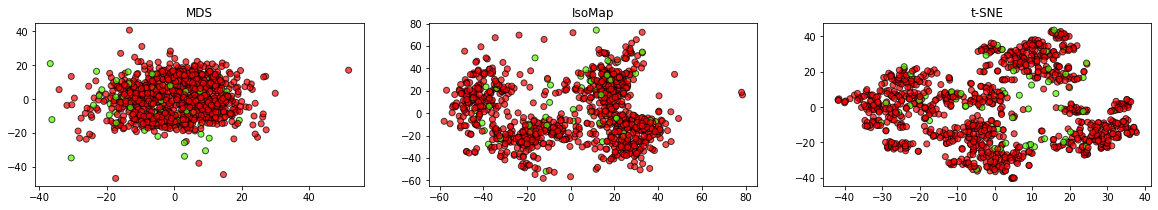

In [346]:
fig, axes = plt.subplots(1, 3, figsize=(20,3))


mds = MDS(n_components=2) #, normalized_stress='auto') # shoudl run as sammon mapping
X_train_mds = mds.fit_transform(X_train)
X_train_mds.shape
axes[0].scatter(X_train_mds[:, 0], X_train_mds[:, 1], c=y_train, cmap=plt.cm.prism, edgecolor='k', alpha=0.7)
axes[0].set_title('MDS')

iso = Isomap(n_components=2)
X_train_iso = iso.fit_transform(X_train)
X_train_iso.shape
axes[1].scatter(X_train_iso[:, 0], X_train_iso[:, 1], c=y_train, cmap=plt.cm.prism, edgecolor='k', alpha=0.7)
axes[1].set_title('IsoMap')

tsne = TSNE(n_components=2)
X_train_tsne = tsne.fit_transform(X_train)
X_train_tsne.shape
axes[2].scatter(X_train_tsne[:, 0], X_train_tsne[:, 1], c=y_train, cmap=plt.cm.prism, edgecolor='k', alpha=0.7)
axes[2].set_title('t-SNE')

plt.show()

# Now we build two models with  the best sampling technics + best reduction technics based on the previous experiments

Voglio provare adasyn + Tomek

In [347]:
ada = ADASYN(random_state=42)
X_res, y_res = ada.fit_resample(X_train, y_train)
print('Resampled dataset shape %s' % Counter(y_res))

Resampled dataset shape Counter({1: 994, 0: 984})


In [348]:
from sklearn.feature_selection import SelectKBest
sel = SelectKBest(k=33)
X_train_sel = sel.fit_transform(X_res, y_res)
print(X_train_sel.shape)
X_test_sel = sel.transform(X_test)
learner =  DecisionTreeClassifier(max_depth=15,min_samples_leaf=10,min_samples_split=15)
learner.fit(X_train_sel, y_res)
y_pred = learner.predict(X_test_sel)
print(classification_report(y_test, y_pred))


(1978, 33)
              precision    recall  f1-score   support

           0       0.95      0.74      0.83       336
           1       0.07      0.35      0.12        20

    accuracy                           0.72       356
   macro avg       0.51      0.54      0.48       356
weighted avg       0.90      0.72      0.79       356



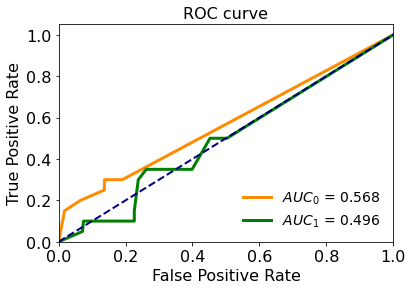

In [349]:
y_score = learner.predict_proba(X_test_sel)
fpr, tpr, _ = roc_curve(y_test, y_score[:, 1])
roc_auc = auc(fpr, tpr)

plt.plot(fpr0, tpr0, color='darkorange', lw=3, label='$AUC_0$ = %.3f' % (roc_auc0))
plt.plot(fpr, tpr, color='green', lw=3, label='$AUC_1$ = %.3f' % (roc_auc))

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.title('ROC curve', fontsize=16)
plt.legend(loc="lower right", fontsize=14, frameon=False)
plt.tick_params(axis='both', which='major', labelsize=16)
plt.show()



In [350]:
learner_KNN = KNeighborsClassifier(n_neighbors= 2, metric= 'euclidean', weights= 'distance')
learner.fit(X_train_sel, y_res)
y_pred = learner.predict(X_test_sel)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.74      0.83       336
           1       0.07      0.35      0.12        20

    accuracy                           0.72       356
   macro avg       0.51      0.54      0.48       356
weighted avg       0.90      0.72      0.79       356



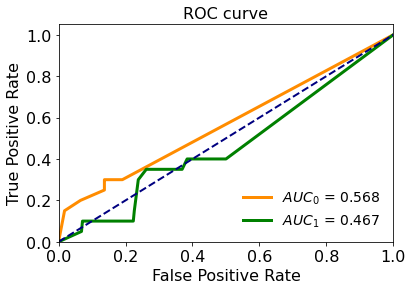

In [351]:
y_score = learner.predict_proba(X_test_sel)
fpr, tpr, _ = roc_curve(y_test, y_score[:, 1])
roc_auc = auc(fpr, tpr)

plt.plot(fpr0, tpr0, color='darkorange', lw=3, label='$AUC_0$ = %.3f' % (roc_auc0))
plt.plot(fpr, tpr, color='green', lw=3, label='$AUC_1$ = %.3f' % (roc_auc))

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.title('ROC curve', fontsize=16)
plt.legend(loc="lower right", fontsize=14, frameon=False)
plt.tick_params(axis='both', which='major', labelsize=16)
plt.show()



In [352]:
from imblearn.under_sampling import TomekLinks

tl = TomekLinks()
X_res, y_res = tl.fit_resample(X_train, y_train)
print('Resampled dataset shape %s' % Counter(y_res))

Resampled dataset shape Counter({0: 973, 1: 59})


In [353]:
from sklearn.feature_selection import SelectKBest
sel = SelectKBest(k=33)
X_train_sel = sel.fit_transform(X_res, y_res)
print(X_train_sel.shape)
X_test_sel = sel.transform(X_test)
learner =  DecisionTreeClassifier(max_depth=15,min_samples_leaf=10,min_samples_split=15)
learner.fit(X_train_sel, y_res)
y_pred = learner.predict(X_test_sel)
print(classification_report(y_test, y_pred))




(1032, 33)
              precision    recall  f1-score   support

           0       0.95      0.98      0.97       336
           1       0.33      0.15      0.21        20

    accuracy                           0.94       356
   macro avg       0.64      0.57      0.59       356
weighted avg       0.92      0.94      0.92       356



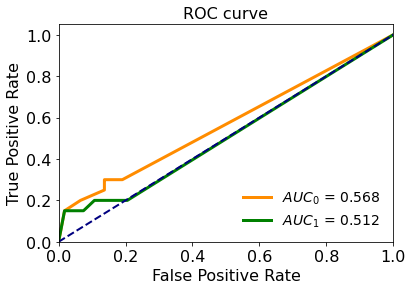

In [354]:
y_score = learner.predict_proba(X_test_sel)
fpr, tpr, _ = roc_curve(y_test, y_score[:, 1])
roc_auc = auc(fpr, tpr)

plt.plot(fpr0, tpr0, color='darkorange', lw=3, label='$AUC_0$ = %.3f' % (roc_auc0))
plt.plot(fpr, tpr, color='green', lw=3, label='$AUC_1$ = %.3f' % (roc_auc))

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.title('ROC curve', fontsize=16)
plt.legend(loc="lower right", fontsize=14, frameon=False)
plt.tick_params(axis='both', which='major', labelsize=16)
plt.show()



In [355]:
learner = KNeighborsClassifier(n_neighbors= 2, metric= 'euclidean', weights= 'distance')
learner.fit(X_train_sel, y_res)
y_pred = learner.predict(X_test_sel)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.97      0.96       336
           1       0.17      0.10      0.12        20

    accuracy                           0.92       356
   macro avg       0.56      0.54      0.54       356
weighted avg       0.90      0.92      0.91       356



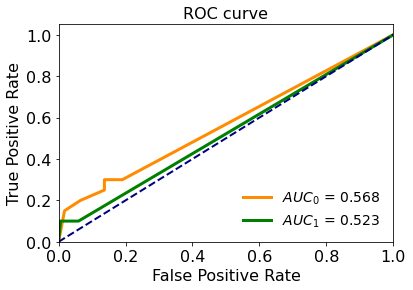

In [356]:
y_score = learner.predict_proba(X_test_sel)
fpr, tpr, _ = roc_curve(y_test, y_score[:, 1])
roc_auc = auc(fpr, tpr)

plt.plot(fpr0, tpr0, color='darkorange', lw=3, label='$AUC_0$ = %.3f' % (roc_auc0))
plt.plot(fpr, tpr, color='green', lw=3, label='$AUC_1$ = %.3f' % (roc_auc))

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.title('ROC curve', fontsize=16)
plt.legend(loc="lower right", fontsize=14, frameon=False)
plt.tick_params(axis='both', which='major', labelsize=16)
plt.show()



In [357]:
from sklearn.feature_selection import RFE

sel = RFE(DecisionTreeClassifier(max_depth=15,min_samples_leaf=10,min_samples_split=15), n_features_to_select=20)
X_train_sel = sel.fit_transform(X_res, y_res)
print(f" DT New dimension: {X_train_sel.shape}")
X_test_sel = sel.transform(X_test)

learner = KNeighborsClassifier(n_neighbors= 2, metric= 'euclidean', weights= 'distance')
learner.fit(X_train_sel, y_res)
y_pred = learner.predict(X_test_sel)
print(classification_report(y_test,y_pred))

 DT New dimension: (1032, 20)
              precision    recall  f1-score   support

           0       0.95      0.90      0.93       336
           1       0.09      0.15      0.11        20

    accuracy                           0.86       356
   macro avg       0.52      0.53      0.52       356
weighted avg       0.90      0.86      0.88       356



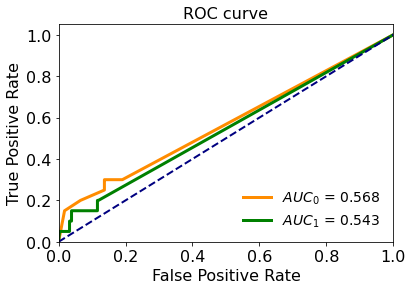

In [358]:
y_score = learner.predict_proba(X_test_sel)
fpr, tpr, _ = roc_curve(y_test, y_score[:, 1])
roc_auc = auc(fpr, tpr)

plt.plot(fpr0, tpr0, color='darkorange', lw=3, label='$AUC_0$ = %.3f' % (roc_auc0))
plt.plot(fpr, tpr, color='green', lw=3, label='$AUC_1$ = %.3f' % (roc_auc))

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.title('ROC curve', fontsize=16)
plt.legend(loc="lower right", fontsize=14, frameon=False)
plt.tick_params(axis='both', which='major', labelsize=16)
plt.show()



In [359]:
ada = ADASYN(random_state=42)
X_res, y_res = ada.fit_resample(X_train, y_train)
print('Resampled dataset shape %s' % Counter(y_res))

Resampled dataset shape Counter({1: 994, 0: 984})


In [360]:
sel = RFE(DecisionTreeClassifier(max_depth=15,min_samples_leaf=10,min_samples_split=15), n_features_to_select=20)
X_train_sel = sel.fit_transform(X_res, y_res)
print(f" DT New dimension: {X_train_sel.shape}")
X_test_sel = sel.transform(X_test)

learner = KNeighborsClassifier(n_neighbors= 2, metric= 'euclidean', weights= 'distance')
learner.fit(X_train_sel, y_res)
y_pred = learner.predict(X_test_sel)
print(classification_report(y_test,y_pred))

 DT New dimension: (1978, 20)
              precision    recall  f1-score   support

           0       0.96      0.84      0.89       336
           1       0.11      0.35      0.17        20

    accuracy                           0.81       356
   macro avg       0.54      0.59      0.53       356
weighted avg       0.91      0.81      0.85       356



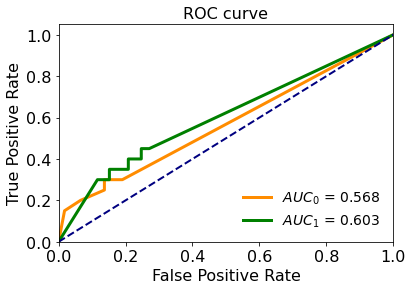

In [361]:
y_score = learner.predict_proba(X_test_sel)
fpr, tpr, _ = roc_curve(y_test, y_score[:, 1])
roc_auc = auc(fpr, tpr)

plt.plot(fpr0, tpr0, color='darkorange', lw=3, label='$AUC_0$ = %.3f' % (roc_auc0))
plt.plot(fpr, tpr, color='green', lw=3, label='$AUC_1$ = %.3f' % (roc_auc))

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.title('ROC curve', fontsize=16)
plt.legend(loc="lower right", fontsize=14, frameon=False)
plt.tick_params(axis='both', which='major', labelsize=16)
plt.show()



In [362]:
learner = DecisionTreeClassifier(max_depth=15,min_samples_leaf=10,min_samples_split=15)
learner.fit(X_train_sel, y_res)
y_pred = learner.predict(X_test_sel)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.95      0.90      0.92       336
           1       0.12      0.25      0.17        20

    accuracy                           0.86       356
   macro avg       0.54      0.57      0.54       356
weighted avg       0.91      0.86      0.88       356



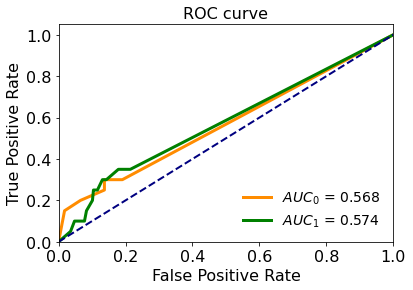

In [363]:
y_score = learner.predict_proba(X_test_sel)
fpr, tpr, _ = roc_curve(y_test, y_score[:, 1])
roc_auc = auc(fpr, tpr)

plt.plot(fpr0, tpr0, color='darkorange', lw=3, label='$AUC_0$ = %.3f' % (roc_auc0))
plt.plot(fpr, tpr, color='green', lw=3, label='$AUC_1$ = %.3f' % (roc_auc))

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.title('ROC curve', fontsize=16)
plt.legend(loc="lower right", fontsize=14, frameon=False)
plt.tick_params(axis='both', which='major', labelsize=16)
plt.show()



### OUTLIER DETECTION

In [364]:


tl = TomekLinks()
X_res, y_res = tl.fit_resample(X_train, y_train)
print('Resampled dataset shape %s' % Counter(y_res))

Resampled dataset shape Counter({0: 973, 1: 59})


In [365]:
sel = SelectKBest(k=33)
X_train_sel = sel.fit_transform(X_res, y_res)
print(X_train_sel.shape)

(1032, 33)


In [367]:
from sklearn.neighbors import LocalOutlierFactor
from sklearn.ensemble import IsolationForest
from pyod.models.abod import ABOD
from pyod.models.knn import KNN

In [378]:
clf_LOF = LocalOutlierFactor(n_neighbors = 2)
y_pred = clf_LOF.fit_predict(X_train_sel)
y_outliers = X_train_sel[y_pred==-1]
np.unique(y_pred, return_counts=True)

(array([-1,  1]), array([ 52, 980]))

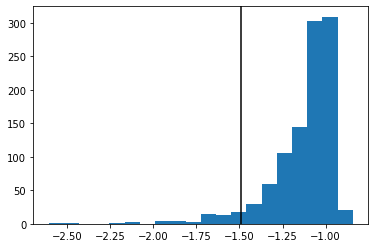

In [379]:
plt.hist(clf_LOF.negative_outlier_factor_, bins=20)
plt.axvline(np.min(clf_LOF.negative_outlier_factor_[np.where(y_pred==1)]), c='k')
plt.show()

Text(0.5, 1.0, 'LOF Outliers')

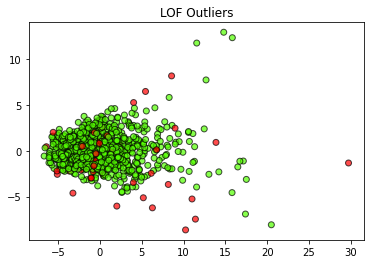

In [381]:
pca = PCA(n_components=2)
pca.fit(X_train_sel)
X_pca = pca.transform(X_train_sel)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_pred, cmap=plt.cm.prism, edgecolor='k', alpha=0.7)
plt.title("LOF Outliers")

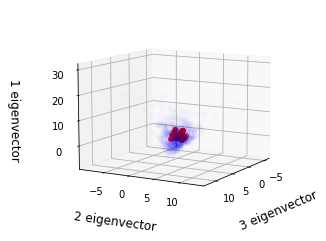

In [382]:
from matplotlib import pyplot
from mpl_toolkits.mplot3d import Axes3D
import random

pca = PCA(n_components=3)
pca.fit(X_train_sel)
X_pca = pca.transform(X_train_sel)

fig = plt.figure(figsize=(5,4))
ax = fig.add_subplot(111, projection="3d")

x_vals = X_pca[:, 2]
y_vals = X_pca[:, 1]
z_vals = X_pca[:, 0]

ax.scatter(x_vals, y_vals, z_vals, c='b', alpha = 0.01)

x_vals = y_outliers[:, 2]
y_vals = y_outliers[:, 1]
z_vals = y_outliers[:, 0]
ax.scatter(x_vals, y_vals, z_vals, c = 'r')

ax.set_xlabel('3 Eigenvector'.capitalize().replace("_", " "), fontsize =12, labelpad=15)
ax.set_ylabel('2 Eigenvector'.capitalize().replace("_", " "), fontsize =12, labelpad=15)
ax.set_zlabel('1 Eigenvector'.capitalize().replace("_", " "), fontsize =12, labelpad=15) 

ax.view_init(10, 30)
plt.show()

In [383]:
# list with indexes and scores only for outliers --> np.where(y_pred==-1)
outlier_indexes = np.where(y_pred==-1)[0]
outlier_scores = clf_LOF.negative_outlier_factor_[outlier_indexes]

outlier_factor_list = []
for i in range(0,len(outlier_scores)):
    outlier_factor_list.append((outlier_indexes[i], outlier_scores[i]))
print(len(outlier_factor_list))

#We sort in ascending order with respect to LOF factor
def outlier_score(elem):
    return elem[1]
outlier_factor_list = sorted(outlier_factor_list, key=outlier_score)
outlier_factor_list[:10]

52


[(369, -2.607142125126038),
 (1027, -2.47672671902453),
 (962, -2.2120268671975785),
 (837, -2.1309777764239564),
 (996, -2.111168418314335),
 (173, -2.090182415644107),
 (469, -1.943906235157956),
 (770, -1.938488885188248),
 (374, -1.9140024671639355),
 (422, -1.90717972099294)]

In [388]:
top1perc = int(float(len(X_train_sel))*0.01)
top1perc

top_outliers_LOF = outlier_factor_list[:top1perc]
print(len(top_outliers_LOF))

indexes_list = [i[0] for i in top_outliers_LOF] #retrieve indexes of outliers
df_LOF_outliers = X_train_sel[indexes_list]
df_LOF_outliers

10


array([[ 2.99243680e+00,  2.51237939e+00,  2.66406843e+00,
         5.60380209e+00, -2.77676666e+00,  4.44228002e+00,
         1.64046030e+01,  5.56025947e+00,  1.11775190e+01,
         1.63828229e+01,  1.56913138e+00,  1.29901687e+01,
        -2.77055667e+00,  2.92697412e+00,  5.76608945e-01,
         4.43347092e+00,  7.73835707e+00,  1.55495192e+00,
         6.76858616e+00,  8.18258258e+00,  1.32049369e+00,
        -3.07529847e+00,  1.83744917e+00,  2.32912354e+00,
         1.85142461e+00,  4.11313810e+00,  9.16844069e+00,
         5.94852656e+00,  9.33549510e+00,  1.92921293e+00,
         1.93731929e+00,  1.82536595e+00, -1.71494567e-01],
       [-4.37733090e-01,  4.57837906e-02,  1.90386119e+00,
         8.18851132e-01, -5.59573506e-02,  1.49151322e-01,
         2.07925591e+00, -4.34343954e-01,  2.26626378e+00,
         2.48630200e+00,  5.34246181e+00,  4.27082256e+00,
        -1.82054526e+00,  1.91560691e+00,  9.41348696e-01,
        -9.60736806e-01,  1.37555657e+00,  5.28020082e-

### Distance-based-approach

KNN

In [410]:
clf = KNN(n_neighbors=2)
clf.fit(X_train_sel)

KNN(algorithm='auto', contamination=0.1, leaf_size=30, method='largest',
  metric='minkowski', metric_params=None, n_jobs=1, n_neighbors=2, p=2,
  radius=1.0)

In [411]:
y_pred = clf.predict(X_train_sel)
np.unique(y_pred, return_counts=True)



(array([0, 1]), array([959,  73]))

In [412]:
y_outliers = X_train_sel[y_pred==1]

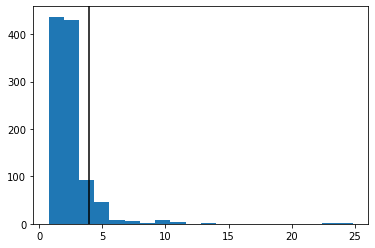

In [413]:
plt.hist(clf.decision_scores_, bins=20)
plt.axvline(np.min(clf.decision_scores_[np.where(outliers==1)]), c='k')
plt.show()

Text(0.5, 1.0, 'KNN Outliers')

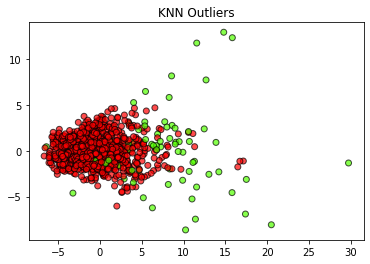

In [417]:
pca = PCA(n_components=2)
pca.fit(X_train_sel)
X_pca = pca.transform(X_train_sel)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_pred, cmap=plt.cm.prism, edgecolor='k', alpha=0.7)
plt.title("KNN Outliers")

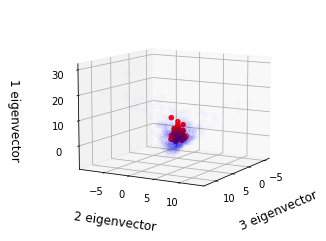

In [415]:
from matplotlib import pyplot
from mpl_toolkits.mplot3d import Axes3D
import random

pca = PCA(n_components=3)
pca.fit(X_train_sel)
X_pca = pca.transform(X_train_sel)

fig = plt.figure(figsize=(5,4))
ax = fig.add_subplot(111, projection="3d")

x_vals = X_pca[:, 2]
y_vals = X_pca[:, 1]
z_vals = X_pca[:, 0]

ax.scatter(x_vals, y_vals, z_vals, c='b', alpha = 0.01)

x_vals = y_outliers[:, 2]
y_vals = y_outliers[:, 1]
z_vals = y_outliers[:, 0]
ax.scatter(x_vals, y_vals, z_vals, c = 'r')

ax.set_xlabel('3 Eigenvector'.capitalize().replace("_", " "), fontsize =12, labelpad=15)
ax.set_ylabel('2 Eigenvector'.capitalize().replace("_", " "), fontsize =12, labelpad=15)
ax.set_zlabel('1 Eigenvector'.capitalize().replace("_", " "), fontsize =12, labelpad=15) 

ax.view_init(10, 30)
plt.show()

In [429]:
clf = ABOD()
clf.fit(X_train_sel)

ABOD(contamination=0.1, method='fast', n_neighbors=5)

In [430]:
y_pred = clf.predict(X_train_sel)
np.unique(y_pred, return_counts=True)

(array([0, 1]), array([909, 123]))

In [431]:
y_outliers = X_train_sel[y_pred==1]

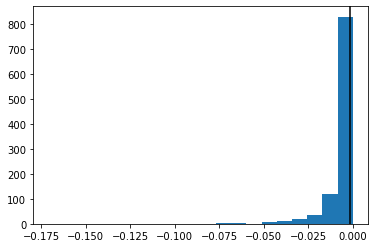

In [432]:
plt.hist(clf.decision_scores_, bins=20)
plt.axvline(np.min(clf.decision_scores_[np.where(y_pred==1)]), c='k')
plt.show()

Text(0.5, 1.0, 'ABOD Outliers')

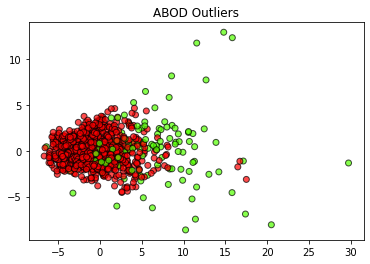

In [433]:
pca = PCA(n_components=2)
pca.fit(X_train_sel)
X_pca = pca.transform(X_train_sel)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_pred, cmap=plt.cm.prism, edgecolor='k', alpha=0.7)
plt.title("ABOD Outliers")

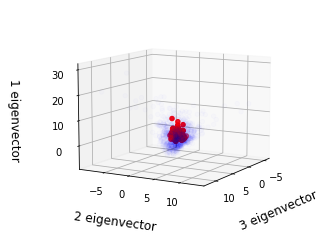

In [434]:
from matplotlib import pyplot
from mpl_toolkits.mplot3d import Axes3D
import random

pca = PCA(n_components=3)
pca.fit(X_train_sel)
X_pca = pca.transform(X_train_sel)

fig = plt.figure(figsize=(5,4))
ax = fig.add_subplot(111, projection="3d")

x_vals = X_pca[:, 2]
y_vals = X_pca[:, 1]
z_vals = X_pca[:, 0]

ax.scatter(x_vals, y_vals, z_vals, c='b', alpha = 0.01)

x_vals = y_outliers[:, 2]
y_vals = y_outliers[:, 1]
z_vals = y_outliers[:, 0]
ax.scatter(x_vals, y_vals, z_vals, c = 'r')

ax.set_xlabel('3 Eigenvector'.capitalize().replace("_", " "), fontsize =12, labelpad=15)
ax.set_ylabel('2 Eigenvector'.capitalize().replace("_", " "), fontsize =12, labelpad=15)
ax.set_zlabel('1 Eigenvector'.capitalize().replace("_", " "), fontsize =12, labelpad=15) 

ax.view_init(10, 30)
plt.show()

### Model based approach

Isolation forest

In [441]:
clf = IsolationForest(random_state=0)
clf.fit(X_train_sel)

IsolationForest(random_state=0)

In [442]:
y_pred = clf.predict(X_train_sel)
np.unique(y_pred, return_counts=True)


(array([-1,  1]), array([ 72, 960]))

In [443]:
y_outliers = X_train_sel[y_pred==1]

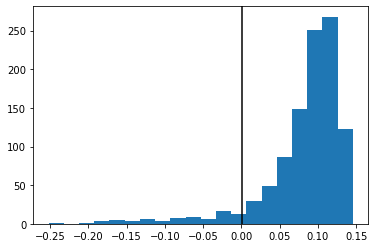

In [444]:
plt.hist(clf.decision_function(X_train_sel), bins=20)
plt.axvline(np.min(clf.decision_function(X_train_sel)[np.where(y_pred==1)]), c='k')
plt.show()

Text(0.5, 1.0, 'Isolation_forest Outliers')

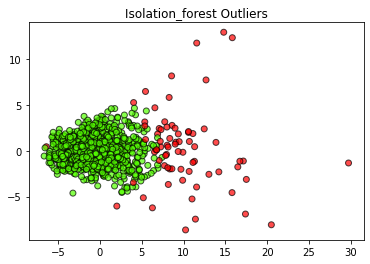

In [445]:
pca = PCA(n_components=2)
pca.fit(X_train_sel)
X_pca = pca.transform(X_train_sel)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_pred, cmap=plt.cm.prism, edgecolor='k', alpha=0.7)
plt.title("Isolation_forest Outliers")

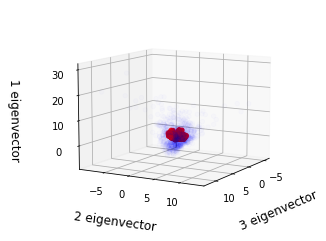

In [446]:
from matplotlib import pyplot
from mpl_toolkits.mplot3d import Axes3D
import random

pca = PCA(n_components=3)
pca.fit(X_train_sel)
X_pca = pca.transform(X_train_sel)

fig = plt.figure(figsize=(5,4))
ax = fig.add_subplot(111, projection="3d")

x_vals = X_pca[:, 2]
y_vals = X_pca[:, 1]
z_vals = X_pca[:, 0]

ax.scatter(x_vals, y_vals, z_vals, c='b', alpha = 0.01)

x_vals = y_outliers[:, 2]
y_vals = y_outliers[:, 1]
z_vals = y_outliers[:, 0]
ax.scatter(x_vals, y_vals, z_vals, c = 'r')

ax.set_xlabel('3 Eigenvector'.capitalize().replace("_", " "), fontsize =12, labelpad=15)
ax.set_ylabel('2 Eigenvector'.capitalize().replace("_", " "), fontsize =12, labelpad=15)
ax.set_zlabel('1 Eigenvector'.capitalize().replace("_", " "), fontsize =12, labelpad=15) 

ax.view_init(10, 30)
plt.show()